In [40]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#nbUsers = input("Enter Number of Users:")
list_names = ['User3', 'User4', 'User5', 'User6', 'User7']
#for i in range(0, int(nbUsers)):
#    userName = input("User Name." + str(i+1) + ":")
#    list_names.append(userName)
nbUsers = len(list_names)

    
#nbAlpha = input("Enter Number of Alpha to Analyse:")
#list_alpha = [0, 0.25, 0.5, 0.75, 1]
list_alpha = [0, 0.25, 0.5, 0.75, 1, 0.05, 0.1, 0.15, 0.2, 0.3]

#for i in range(0, int(nbAlpha)):
#    alphaName = input("Alpha." + str(i+1) + ":")
#    list_alpha.append(alphaName)
nbAlpha = len(list_alpha)
    
#nbBetaGamma = input("Enter Number of BetaGamma to Analyse:")
#list_beta = [0, 1.5, 3, 1.5, 3]
#list_gamma = [0, 0.01, 0.01, 0.005, 0.005]

#list_beta = [0, 1.5, 3, 1.5, 3, 10, 10, 10, 10, 10, 1, 1.5, 2, 2.5, 3]
#list_gamma = [0, 0.01, 0.01, 0.005, 0.005, 0.005, 0.01, 0.05, 0.1, 0.5, 10, 10, 10, 10, 10]

list_beta = [0, 1.5, 3, 1.5, 3, 10, 10, 10, 10, 10, 1, 1.5, 2, 2.5, 3, 2.5, 3]
list_gamma = [0, 0.01, 0.01, 0.005, 0.005, 0.005, 0.01, 0.05, 0.1, 0.5, 10, 10, 10, 10, 10, 0.1, 0.1]

#list_beta = [0, 1.5, 3, 1.5, 3, 1, 1.5, 2, 2.5, 3]
#list_gamma = [0, 0.01, 0.01, 0.005, 0.005, 10, 10, 10, 10, 10]


#for i in range(0, int(nbBetaGamma)):
#    gammaName = input("Gamma." + str(i+1) + ":")
#    betaName = input("Beta." + str(i+1) + ":")
    
#    list_beta.append(betaName)
#    list_gamma.append(gammaName)
nbBetaGamma = len(list_beta)
    
    
    

In [41]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')
    #print(txt.replace('_CapsuleCollider', ''))
    #print(txt)

In [42]:
globalAnalysis = pd.DataFrame()
# Add Distance Bone/Contact -> BoneDist.
# Also record per Obj, Task, Scale
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)

    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-'+list_names[j]+'.csv', sep = ';', decimal = '.')

        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0'] 

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = alphaTime
        #alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([alphaSummary, globalAnalysis], axis = 0, sort=True)

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)

    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perObject-'+list_names[j]+'.csv', sep = ';', decimal = '.')

        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        #alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([alphaSummary, analysisPerObj], axis = 0, sort=True)

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)

    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perTask-'+list_names[j]+'.csv', sep = ';', decimal = '.')

        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([alphaSummary, analysisPerTask], axis = 0, sort=True)

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)

    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perScale-'+list_names[j]+'.csv', sep = ';', decimal = '.')

        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([alphaSummary, analysisPerScale], axis = 0, sort=True)



In [43]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perObject-BoneDist-'+list_names[j]+'.csv', sep = ';', decimal = '.')

        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        #alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([alphaSummary, analysisBoneDistPerObj], axis = 0, sort=True)

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perTask-BoneDist-'+list_names[j]+'.csv', sep = ';', decimal = '.')

        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([alphaSummary, analysisBoneDistPerTask], axis = 0, sort=True)

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perScale-BoneDist-'+list_names[j]+'.csv', sep = ';', decimal = '.')

        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([alphaSummary, analysisBoneDistPerScale], axis = 0, sort=True)

In [44]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [47]:
objects, scales

(['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder'],
 ['small', 'medium', 'large'])

In [48]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [55]:
globalAnalysis.head()

Alpha  Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                                  
0            0.3   NaN    0.000000    0.000000     0.000000     0.000000   
300          0.3   NaN   47.751246   47.751246    37.062800    31.588137   
350          0.3   NaN   53.101608   53.101608    38.644562    34.526004   
400          0.3   NaN   77.747538   77.747538    43.905104    40.742544   
450          0.3   NaN   81.980962   81.980962    45.059367    45.566594   

           BoneDist.12  BoneDist.13  BoneDist.14  BoneDist.15  ...  \
Tolerance                                                      ...   
0             0.000000     0.000000     0.000000     0.000000  ...   
300          23.731906    61.035682    37.938242    25.083636  ...   
350          26.925917    68.559041    42.718169    28.728604  ...   
400          31.211705    75.810805    50.843097    31.414168  ...   
450          33.833961    80.841068    57.056519    33.986945  ...   

           Phalanx.36  Phalanx.37  Phalanx.4  Phalanx.5  Phalanx.6  Phalanx.7  \
Tolerance                                                                       
0            0.000000    0.009877   0.000000   0.000000   0.000000   1.165761   
300          3.124587    6.441217   6.761512   9.982816   4.340418  10.531209   
350          3.863707    6.901630   7.318892  10.866745   5.565703  11.090652   
400          4.090303    7.126222   7.789921  11.800301   6.811257  12.427725   
450          4.797843    7.361809   8.009115  12.367887   8.385374  14.234466   

           Phalanx.8  Phalanx.9  Tolerance   User  
Tolerance                                          
0           3.672766   0.000000          0  User7  
300        14.197494   8.783719        300  User7  
350        16.953454  10.526848        350  User7  
400        19.140328  13.656396        400  User7  
450        20.609877  16.675480        450  User7  

[5 rows x 81 columns]

In [49]:
meanPerScale.head()

Beta  Gamma      large     medium      small
900   3.0    0.1  31.925633  80.330885  53.873577
850   3.0    0.1  31.132394  77.258372  52.512931
800   3.0    0.1  30.129958  74.178713  50.684153
750   3.0    0.1  29.214249  71.199642  49.174084
700   3.0    0.1  27.978907  67.813452  47.301815

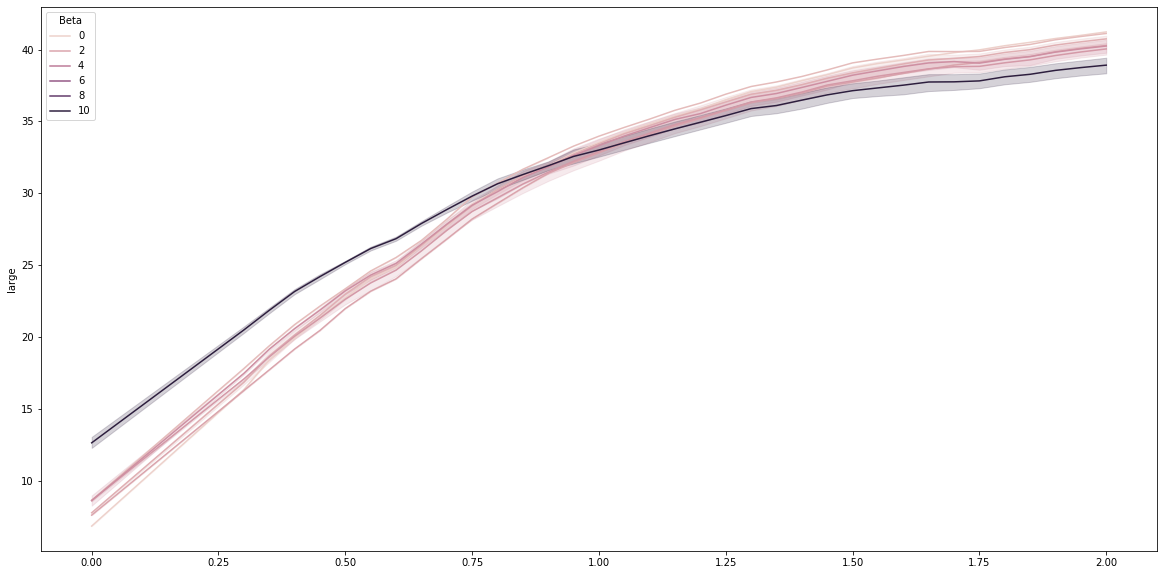

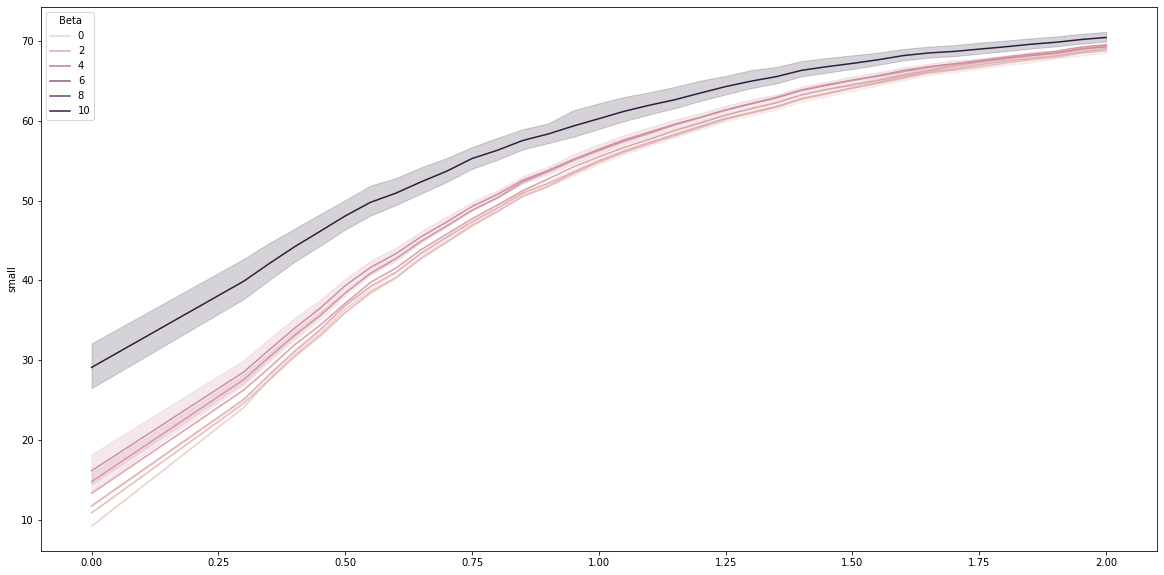

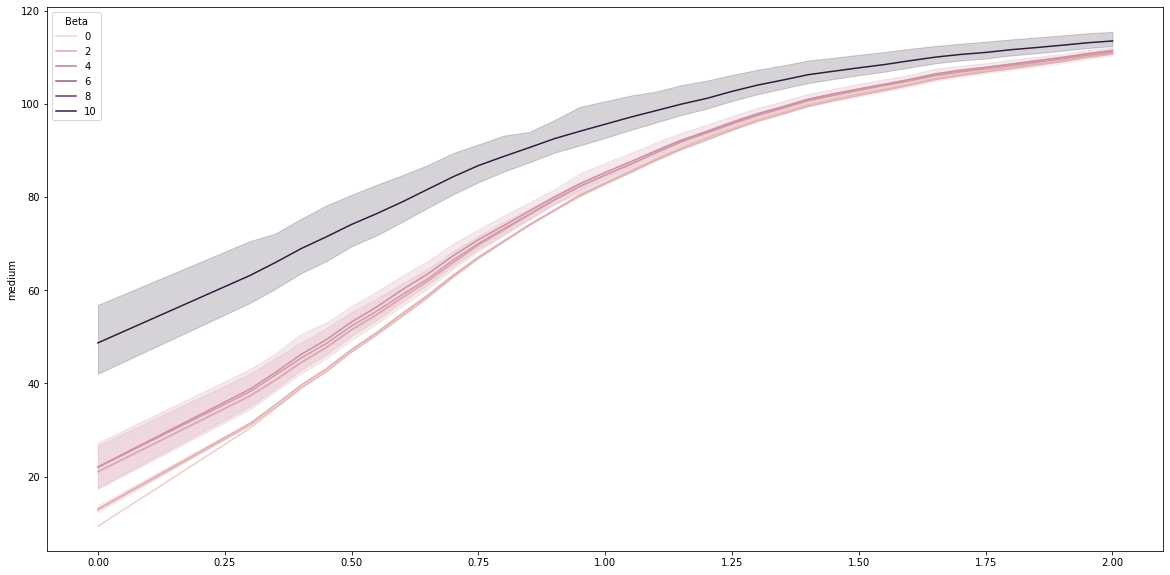

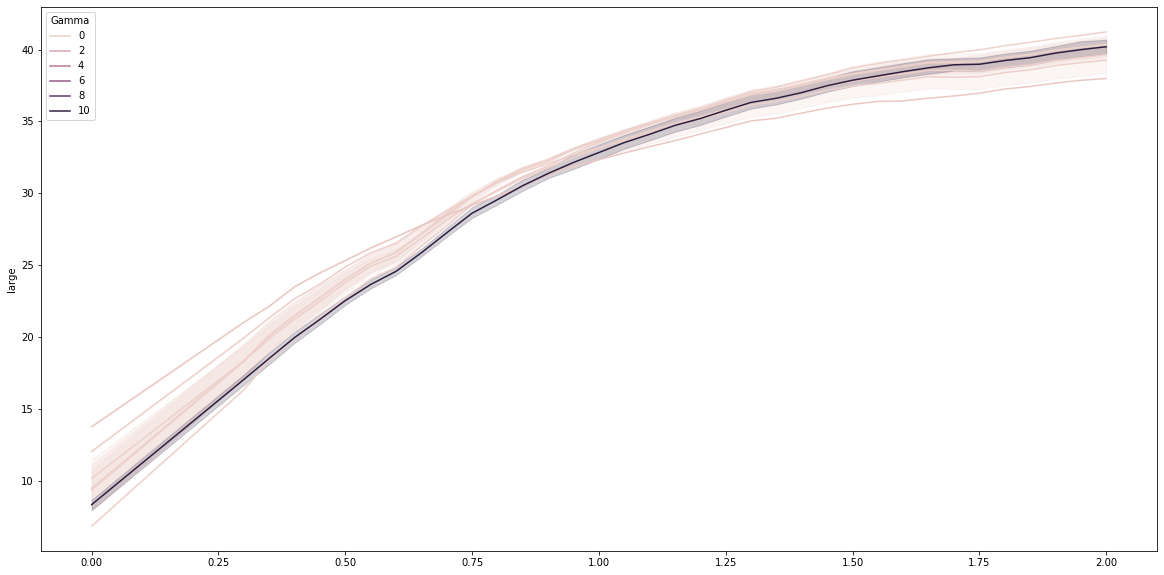

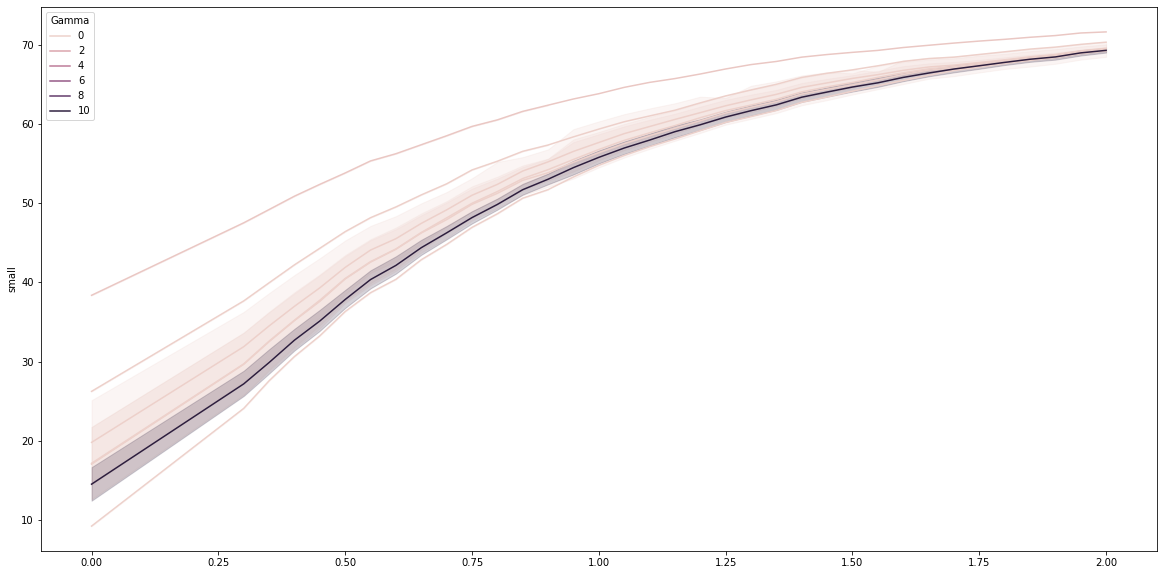

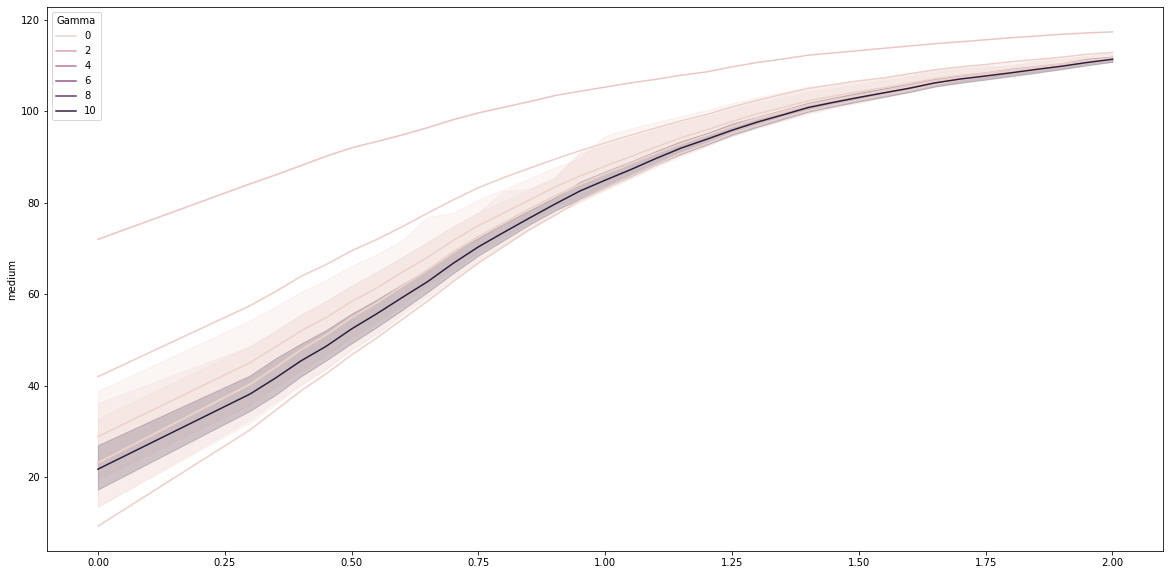

In [50]:
plt.figure(figsize=(20,10))
sns.lineplot(x = meanPerScale.index/1000, y = 'large', hue = 'Beta', data = meanPerScale)
plt.figure(figsize=(20,10))
sns.lineplot(x = meanPerScale.index/1000, y = 'small', hue = 'Beta', data = meanPerScale)
plt.figure(figsize=(20,10))
sns.lineplot(x = meanPerScale.index/1000, y = 'medium', hue = 'Beta', data = meanPerScale)

plt.figure(figsize=(20,10))
sns.lineplot(x=meanPerScale.index/1000, y= 'large', hue = 'Gamma', data = meanPerScale)
plt.figure(figsize=(20,10))
sns.lineplot(x=meanPerScale.index/1000, y='small', hue = 'Gamma', data = meanPerScale)
plt.figure(figsize=(20,10))
sns.lineplot(x=meanPerScale.index/1000, y='medium', hue = 'Gamma', data = meanPerScale)


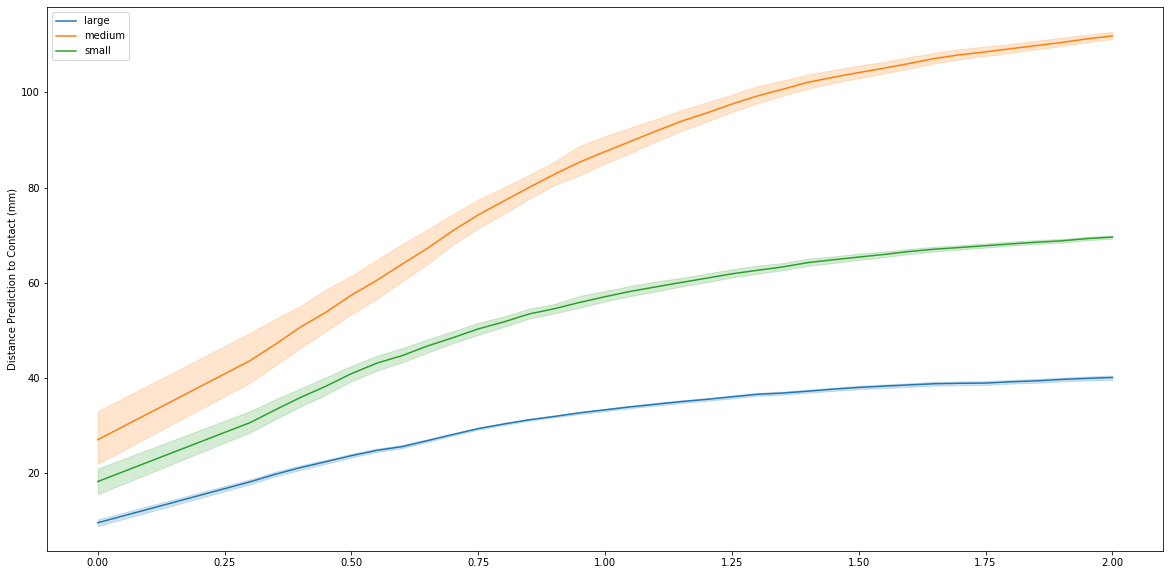

In [39]:
plt.figure(figsize = (20,10))
cond = (meanPerScale['Beta'] == 0) & (meanPerScale['Gamma'] == 0)
toleranceplt = meanPerScale.index/1000
sns.lineplot(x = toleranceplt , y = 'large', data = meanPerScale, label = 'large')
sns.lineplot(x = toleranceplt, y = 'medium', data = meanPerScale, label = 'medium')#[cond])
sns.lineplot(x = toleranceplt, y = 'small', data = meanPerScale, label = 'small')#[cond])
plt.ylabel('Distance Prediction to Contact (mm)')
plt.xlabel = ('Time')
plt.legend()

In [11]:
addData = False

In [12]:
if(addData):
    nbUsers = input("Enter Number of New Users:")
    for i in range(0, int(nbUsers)):
        userName = input("User Name." + str(i+1) + ":")
        list_names.append(userName)
    nbUsers = len(list_names)
    
    nbAlpha = input("Enter Number of New Alpha to Analyse:")
    for i in range(0, int(nbAlpha)):
        alphaName = input("Alpha." + str(i+1) + ":")
        list_alpha.append(alphaName)
    nbAlpha = len(list_alpha)
    
    nbBetaGamma = input("Enter Number of New BetaGamma to Analyse:")
    for i in range(0, int(nbBetaGamma)):
        gammaName = input("Gamma." + str(i+1) + ":")
        betaName = input("Beta." + str(i+1) + ":")

        list_beta.append(betaName)
        list_gamma.append(gammaName)
    nbBetaGamma = len(list_beta)

addData = False        

In [13]:
#globalAnalysis[globalAnalysis['User'] == 'User7']['BoneDist.0']

In [14]:
globalAnalysis

Alpha  Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                                  
0            0.3   NaN    0.000000    0.000000     0.000000     0.000000   
300          0.3   NaN   47.751246   47.751246    37.062800    31.588137   
350          0.3   NaN   53.101608   53.101608    38.644562    34.526004   
400          0.3   NaN   77.747538   77.747538    43.905104    40.742544   
450          0.3   NaN   81.980962   81.980962    45.059367    45.566594   
500          0.3   NaN   85.781585   85.781585    49.699142    51.567531   
550          0.3   NaN  102.508208  102.508208    54.462476    55.176994   
600          0.3   NaN  103.677238  103.677238    59.298607    61.106070   
650          0.3   NaN  103.948846  103.948846    63.729827    62.901076   
700          0.3   NaN  109.503015  109.503015    65.572327    66.784644   
750          0.3   NaN  111.289631  111.289631    70.931211    68.550157   
800          0.3   NaN  114.083869  114.083869    72.230327    72.832393   
850          0.3   NaN  112.394508  112.394508    75.117402    73.478663   
900          0.3   NaN  129.841669  129.841669    77.376528    76.317985   
950          0.3   NaN  129.173715  129.173715    81.021599    77.246550   
1000         0.3   NaN  129.616954  129.616954    80.600017    82.061335   
1050         0.3   NaN  130.271162  130.271162    83.438800    84.955150   
1100         0.3   NaN  130.905877  130.905877    84.836975    87.914187   
1150         0.3   NaN  130.853885  130.853885    85.759429    92.117141   
1200         0.3   NaN  131.215962  131.215962    96.261183    97.650972   
1250         0.3   NaN  131.619885  131.619885    99.460525   100.400017   
1300         0.3   NaN  129.261062  129.261062   126.193271   103.701287   
1350         0.3   NaN  129.500069  129.500069   128.240387   109.432859   
1400         0.3   NaN  174.445600  174.445600   130.966621   111.441915   
1450         0.3   NaN  174.505546  174.505546   131.635200   110.753757   
1500         0.3   NaN  174.505546  174.505546   133.976150   112.008157   
1550         0.3   NaN  174.505546  174.505546   135.332046   114.581135   
1600         0.3   NaN  173.739200  173.739200   136.404158   116.079467   
1650         0.3   NaN  173.617615  173.617615   136.804904   116.143798   
1700         0.3   NaN  173.689685  173.689685   136.862179   117.362906   
...          ...   ...         ...         ...          ...          ...   
550          NaN   0.0   36.563888   38.292150    42.112559    43.618618   
600          NaN   0.0   35.087138   36.815401    44.270710    46.503365   
650          NaN   0.0   38.644801   40.838257    47.851152    50.387785   
700          NaN   0.0   37.837038   39.519894    50.015862    53.518091   
750          NaN   0.0   53.908794   55.591650    51.115462    55.583403   
800          NaN   0.0   61.868456   64.751988    51.115490    59.085357   
850          NaN   0.0   73.563581   76.447113    53.259638    63.732637   
900          NaN   0.0   78.937419   80.741369    54.329348    71.070602   
950          NaN   0.0   77.797206   80.212906    58.633576    77.509418   
1000         NaN   0.0   89.726800   91.192706    66.972017    82.408773   
1050         NaN   0.0   95.303688   98.899944    68.483233    84.613492   
1100         NaN   0.0  100.977963  105.401450    69.081310    90.440332   
1150         NaN   0.0  106.700931  108.382319    74.236550    90.658453   
1200         NaN   0.0  110.954000  112.444256    77.836552    92.244475   
1250         NaN   0.0  111.324169  112.814425    77.107540    93.497214   
1300         NaN   0.0  113.251025  115.080863    79.899936    95.074238   
1350         NaN   0.0  114.528069  115.509000    81.658400    97.767299   
1400         NaN   0.0  115.241863  116.222794    82.201828    99.738322   
1450         NaN   0.0  115.620125  116.474281    85.647747   101.699336   
1500         NaN   0.0  125.990494  126.844650    91.689814

In [15]:
analysisPerTask

Alpha  Beta  Gamma       Pull       Push  Push Down      Raise  \
Tolerance                                                                   
0            0.3   NaN    NaN  -2.038616  -1.474538  -2.025569  -0.907184   
300          0.3   NaN    NaN   7.749825  19.161237  18.442976  23.184617   
350          0.3   NaN    NaN   9.849285  21.397056  21.807450  26.652059   
400          0.3   NaN    NaN  12.178474  24.175709  26.256477  31.807786   
450          0.3   NaN    NaN  14.553571  26.918916  28.920888  34.632010   
500          0.3   NaN    NaN  16.657280  30.762691  31.247219  37.291128   
550          0.3   NaN    NaN  19.063239  34.810624  33.261783  39.720885   
600          0.3   NaN    NaN  21.277886  37.408872  35.497731  43.137984   
650          0.3   NaN    NaN  24.504061  41.096439  37.503355  45.957244   
700          0.3   NaN    NaN  28.037453  43.295068  39.036491  49.030368   
750          0.3   NaN    NaN  31.134914  46.026452  41.096572  52.286289   
800          0.3   NaN    NaN  33.059149  47.934958  43.025883  55.139675   
850          0.3   NaN    NaN  35.557773  52.267553  46.278963  57.621509   
900          0.3   NaN    NaN  38.968388  54.614767  47.738458  60.467268   
950          0.3   NaN    NaN  41.327789  56.456851  49.012385  62.996903   
1000         0.3   NaN    NaN  43.884954  57.829455  50.713028  66.515961   
1050         0.3   NaN    NaN  46.226878  59.515888  52.143003  69.181407   
1100         0.3   NaN    NaN  47.874745  61.571562  54.556740  71.944952   
1150         0.3   NaN    NaN  48.854306  63.222069  55.795304  74.906537   
1200         0.3   NaN    NaN  50.713848  64.418503  56.518089  78.897878   
1250         0.3   NaN    NaN  52.162165  66.281340  58.575498  81.897827   
1300         0.3   NaN    NaN  53.371729  68.154075  60.189992  86.618189   
1350         0.3   NaN    NaN  54.118535  69.641144  61.221092  87.810241   
1400         0.3   NaN    NaN  54.736966  70.420112  62.320248  91.771237   
1450         0.3   NaN    NaN  55.725176  71.486218  63.824437  92.848627   
1500         0.3   NaN    NaN  56.415201  72.590342  64.950134  93.853166   
1550         0.3   NaN    NaN  57.121850  75.328109  67.448784  95.042292   
1600         0.3   NaN    NaN  57.963889  76.405990  68.377025  95.777463   
1650         0.3   NaN    NaN  58.646496  77.613142  69.198992  96.414417   
1700         0.3   NaN    NaN  59.682572  78.294630  74.831940  97.391512   
...          ...   ...    ...        ...        ...        ...        ...   
550          NaN   0.0    0.0  36.942038  29.175190  24.291671  41.152590   
600          NaN   0.0    0.0  39.045352  31.823054  28.174784  43.901733   
650          NaN   0.0    0.0  41.300373  34.348545  33.012708  46.964078   
700          NaN   0.0    0.0  43.494552  38.321197  36.452212  48.861186   
750          NaN   0.0    0.0  46.090674  43.598809  40.626870  52.469839   
800          NaN   0.0    0.0  48.271549  46.722809  45.605902  54.106938   
850          NaN   0.0    0.0  49.686051  49.255836  48.865305  56.564601   
900          NaN   0.0    0.0  51.093633  51.110498  51.828441  59.699635   
950          NaN   0.0    0.0  52.597598  52.564063  55.816489  62.214155   
1000         NaN   0.0    0.0  54.428334  53.598595  57.381320  63.793311   
1050         NaN   0.0    0.0  55.338583  54.498056  59.714448  65.343852   
1100         NaN   0.0    0.0  55.969071  55.473257  60.898856  66.544363   
1150         NaN   0.0    0.0  56.573953  56.376670  61.628915  67.825904   
1200         NaN   0.0    0.0  57.221830  57.146970  63.441964  68.969942   
1250         NaN   0.0    0.0  58.217645  57.847460  65.139025  70.045881   
1300         NaN   0.0    0.0  58.777008  58.366922  66.131592  71.295800   
1350         NaN   0.0    0.0  59.539046  58.795399  67.000730  72.254527   
1400         NaN   0.0    0.0  60.223148  59.713541  67.865991  72.934985   
1450         NaN   0.0    0.0  60.789369  60.349173  68.715345  73.876930   
1500   

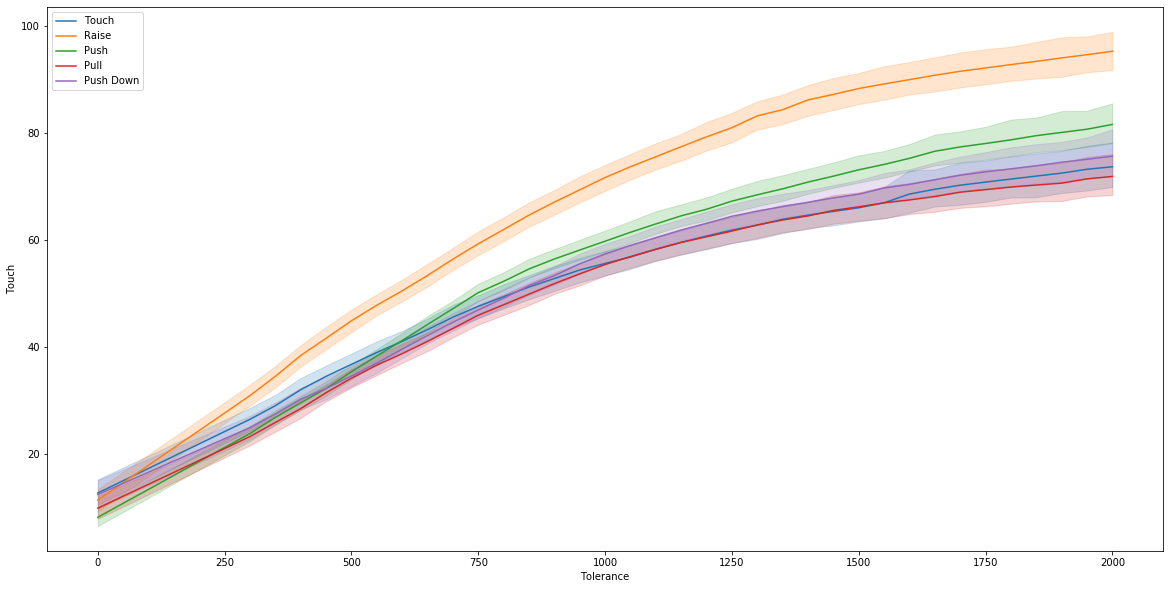

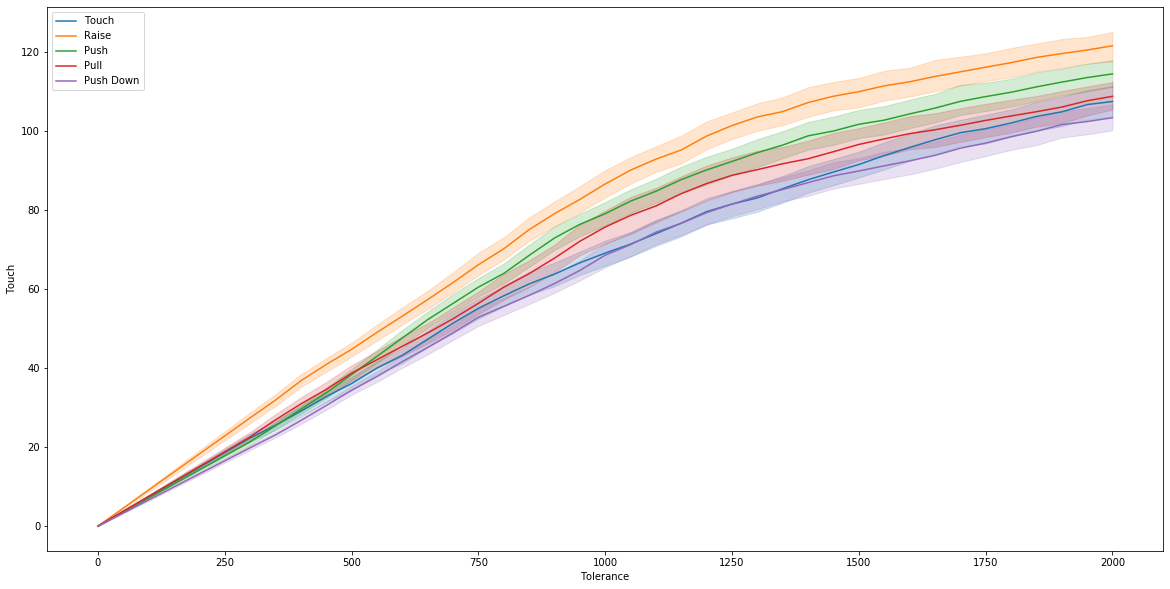

In [16]:
plt.figure(figsize=(20,10))
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', hue = 'Alpha', data = analysisPerTask)
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', hue = 'Beta', data = analysisPerTask)
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Push Down')

plt.figure(figsize=(20,10))
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', hue = 'Alpha', data = analysisPerTask)
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', hue = 'Beta', data = analysisPerTask)
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Push Down')



#plt.figure(figsize=(20,10))
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', hue = 'Beta', data = analysisPerTask)


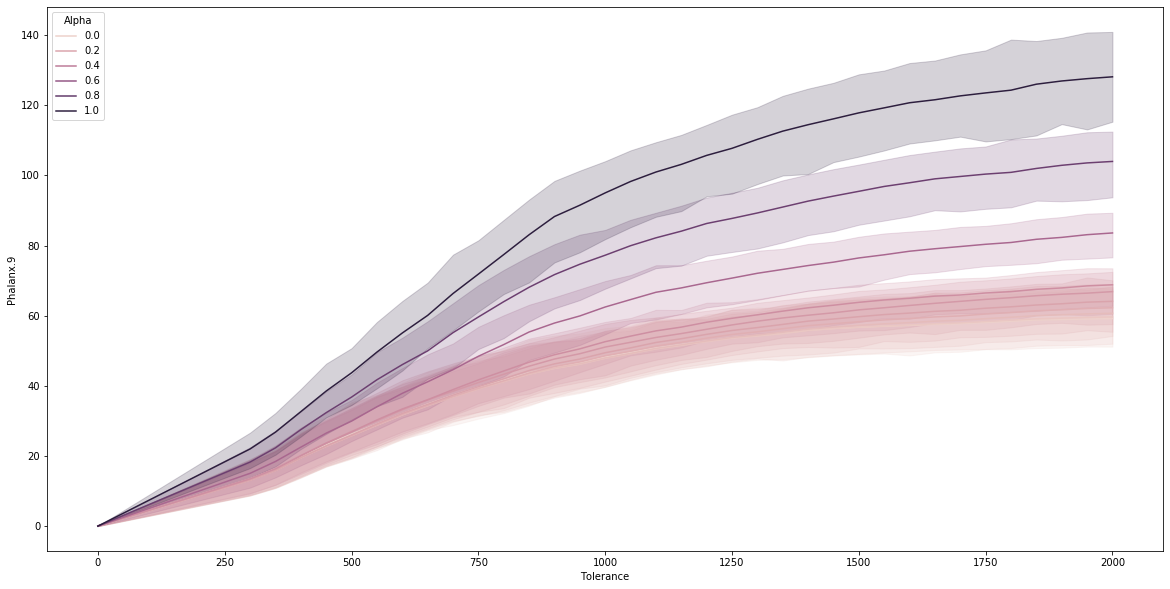

In [17]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Phalanx.9', hue = 'Alpha', data = globalAnalysis)


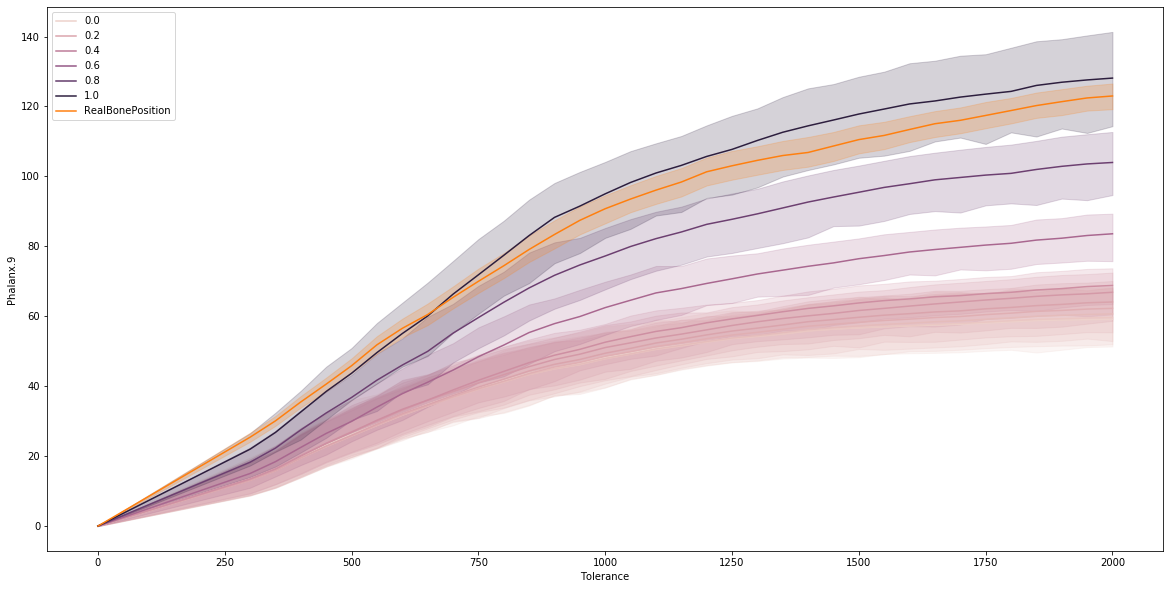

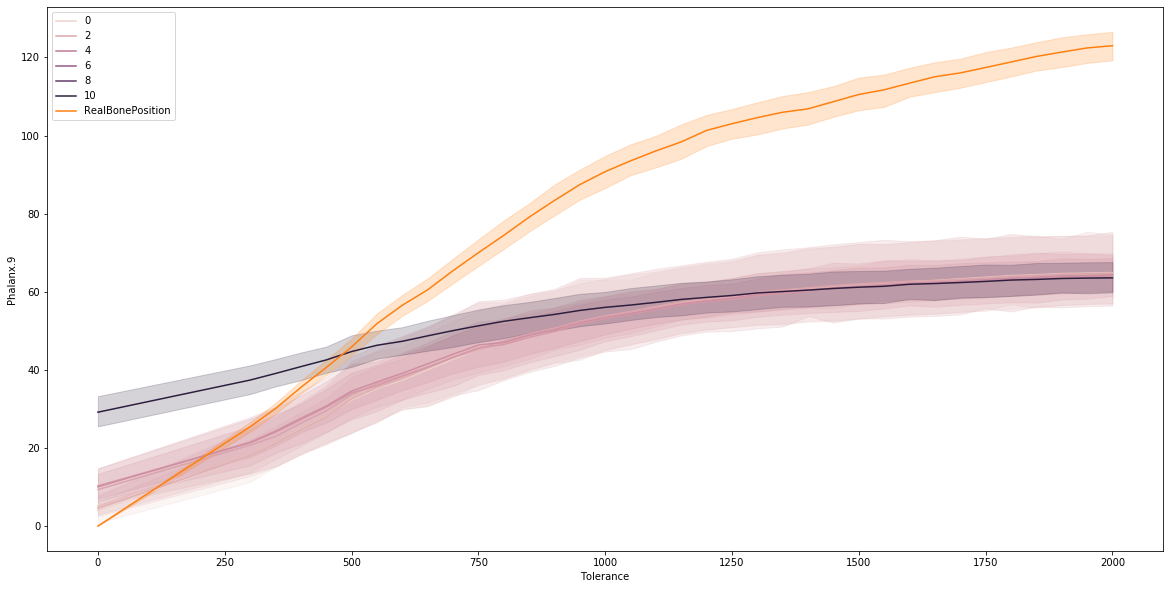

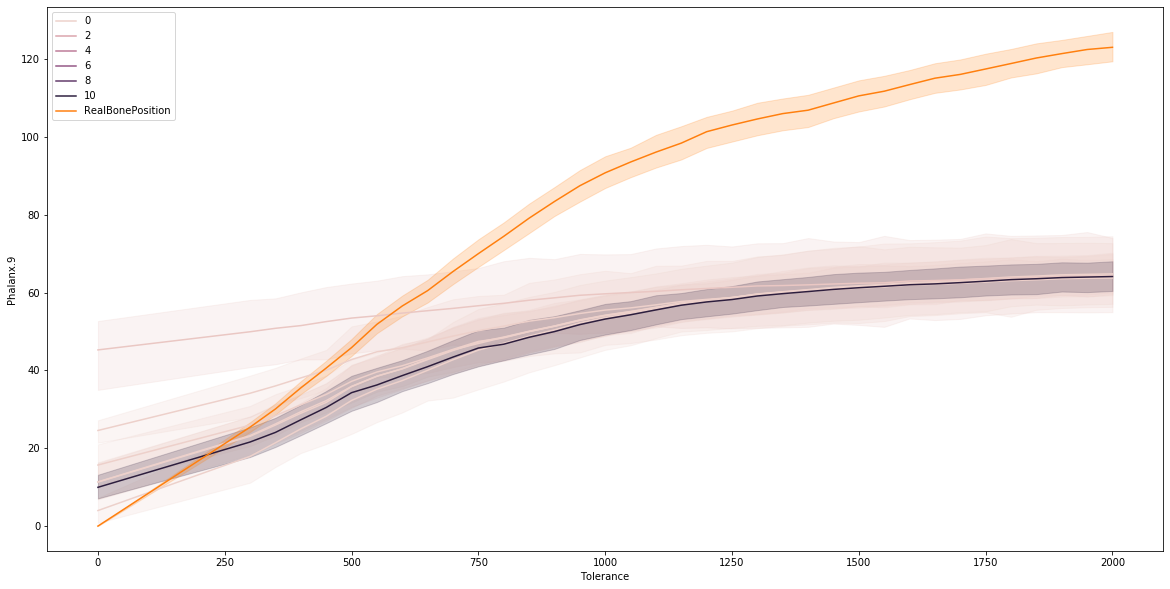

In [18]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Phalanx.9', hue = 'Alpha', data = globalAnalysis)
bonedistplot = sns.lineplot(x = 'Tolerance', y = 'BoneDist.9', data = globalAnalysis, label = 'RealBonePosition')

plt.ylim = (0, 140)
plt.figure(figsize=(20,10))
betaplot = sns.lineplot(x = 'Tolerance', y = 'Phalanx.9', hue = 'Beta', data = globalAnalysis)
bonedistplot = sns.lineplot(x = 'Tolerance', y = 'BoneDist.9', data = globalAnalysis, label = 'RealBonePosition')

plt.ylim = (0, 140)
plt.figure(figsize=(20,10))
plt.ylim = (0, 140)
gammaplot = sns.lineplot(x = 'Tolerance', y = 'Phalanx.9', hue = 'Gamma', data = globalAnalysis)
bonedistplot = sns.lineplot(x = 'Tolerance', y = 'BoneDist.9', data = globalAnalysis, label = 'RealBonePosition')





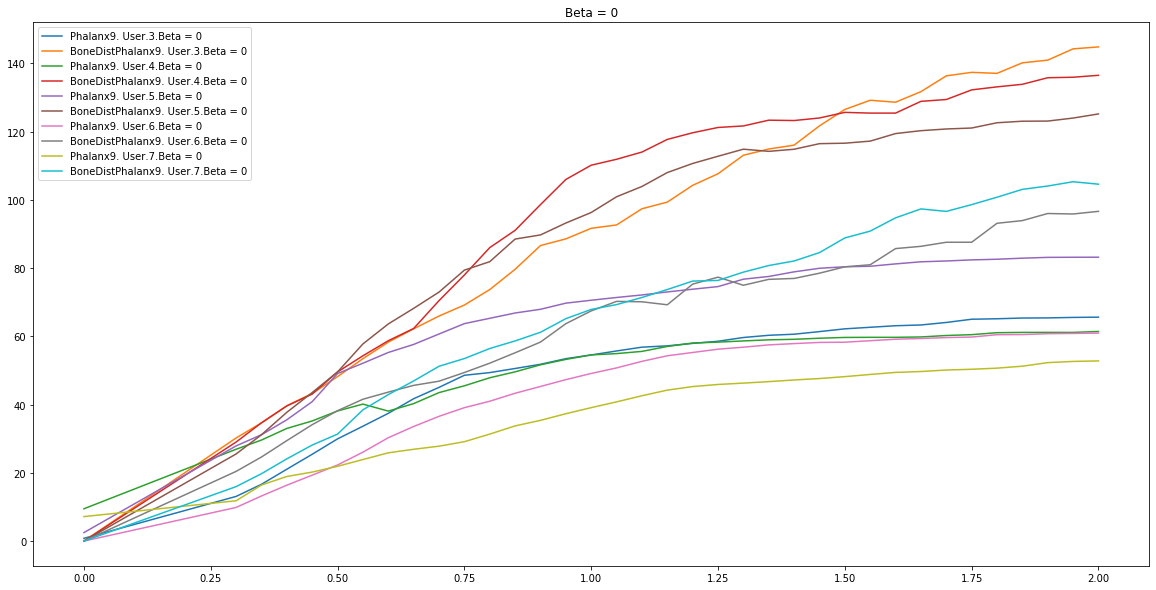

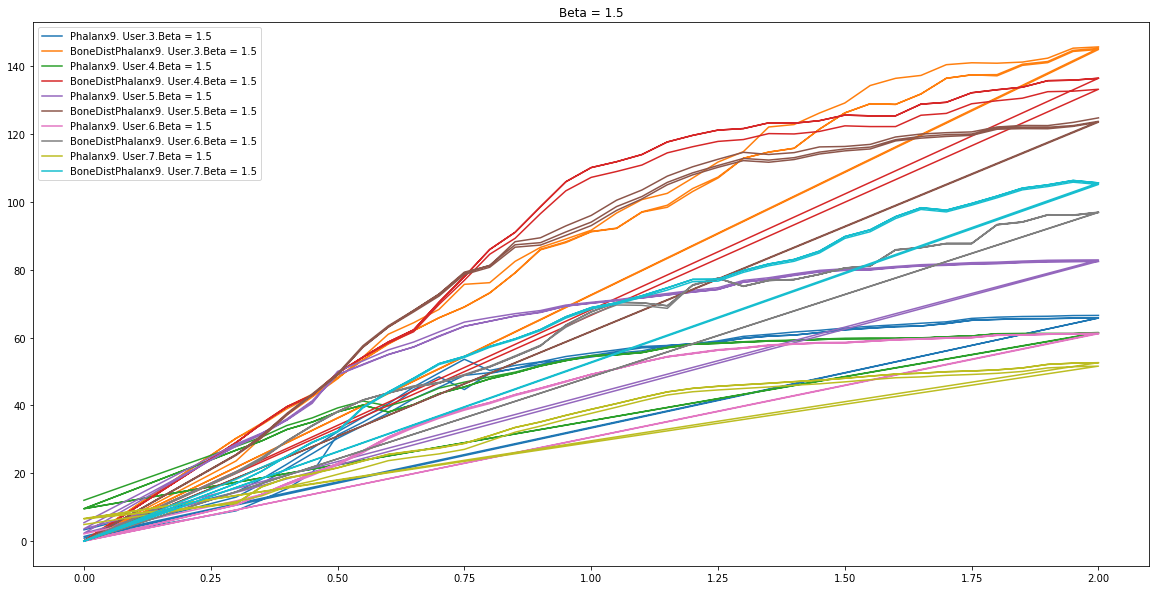

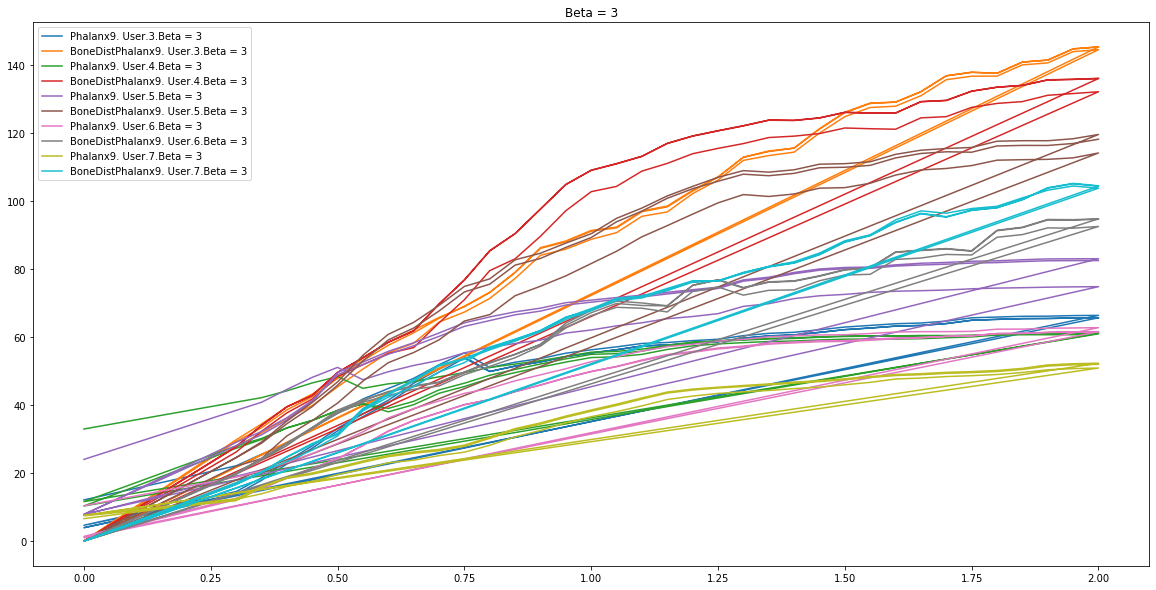

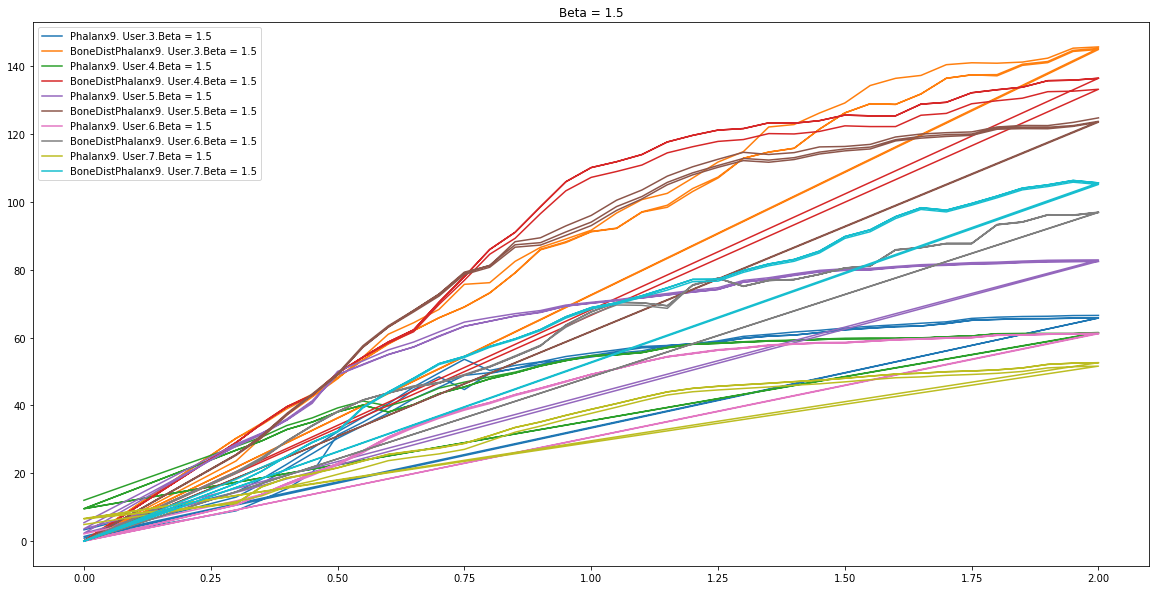

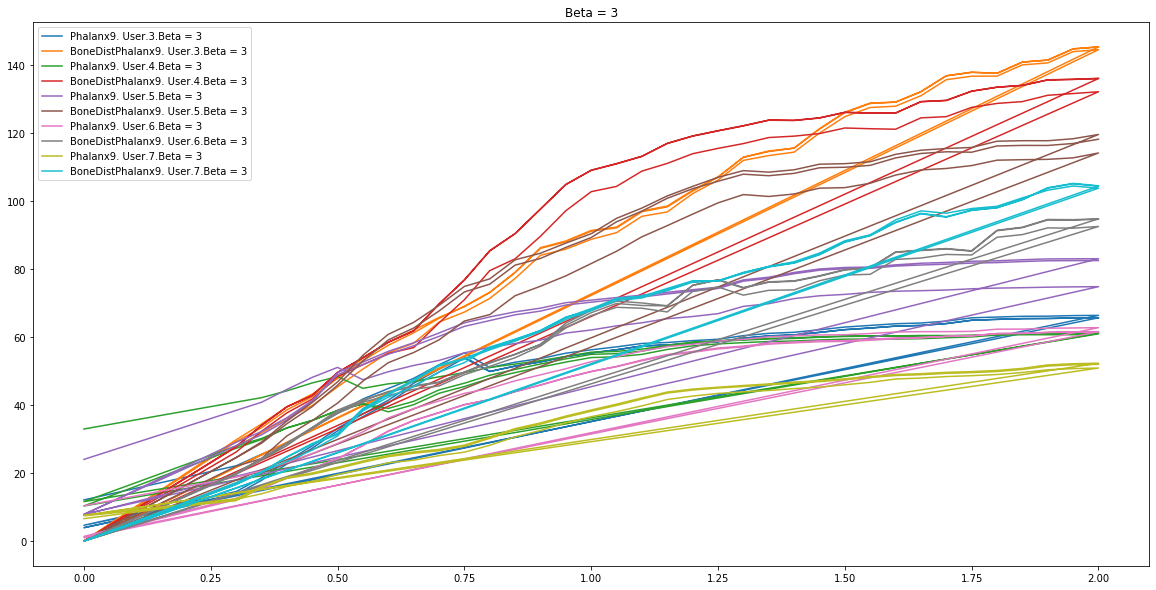

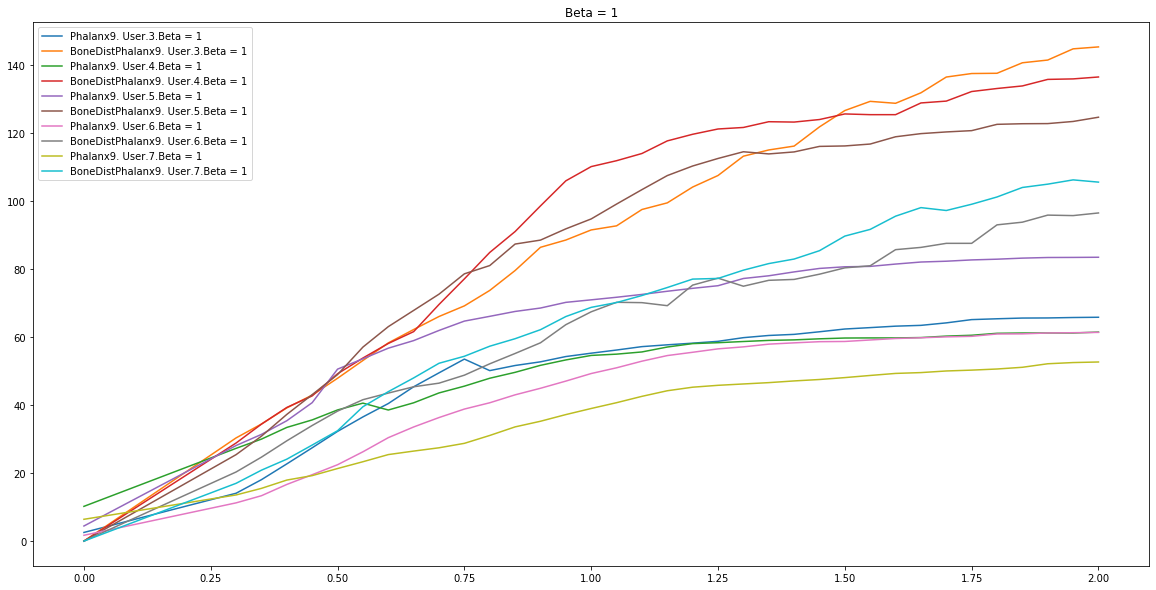

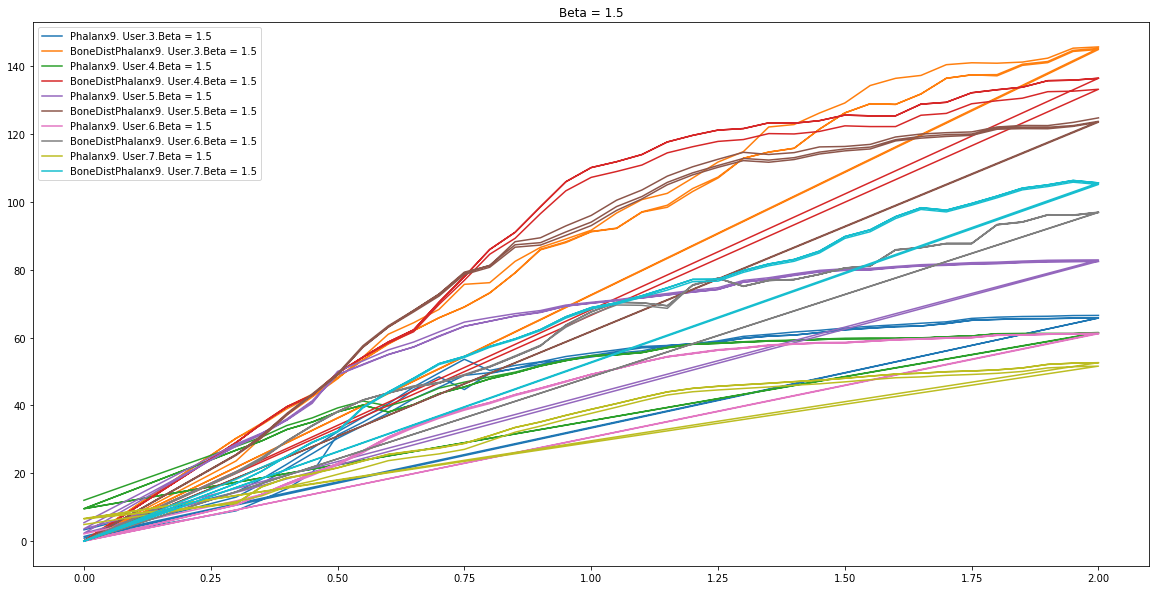

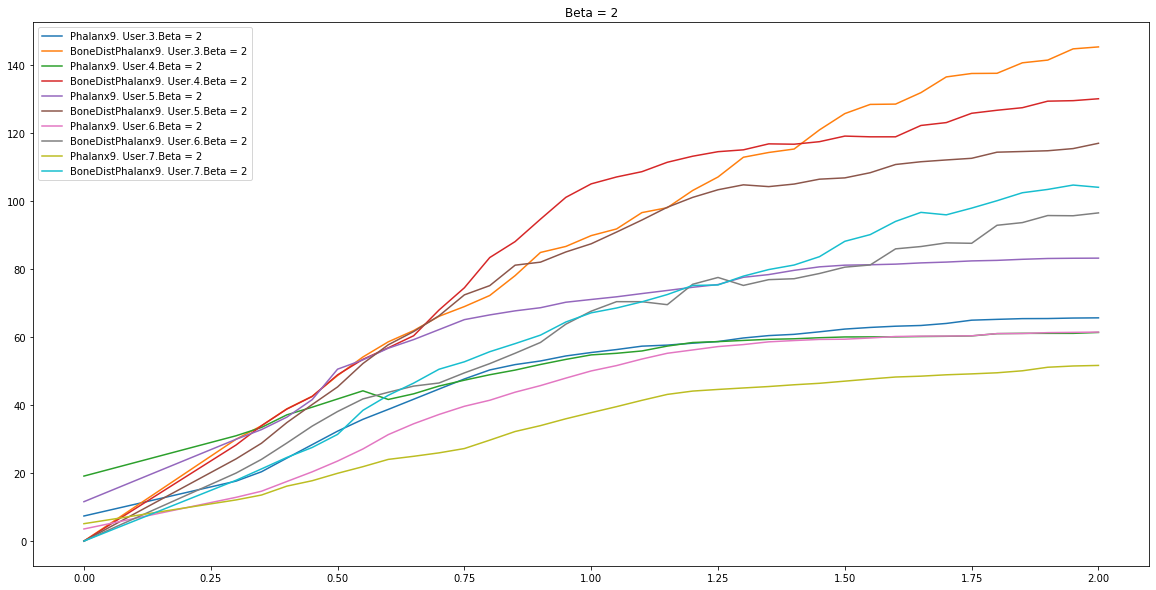

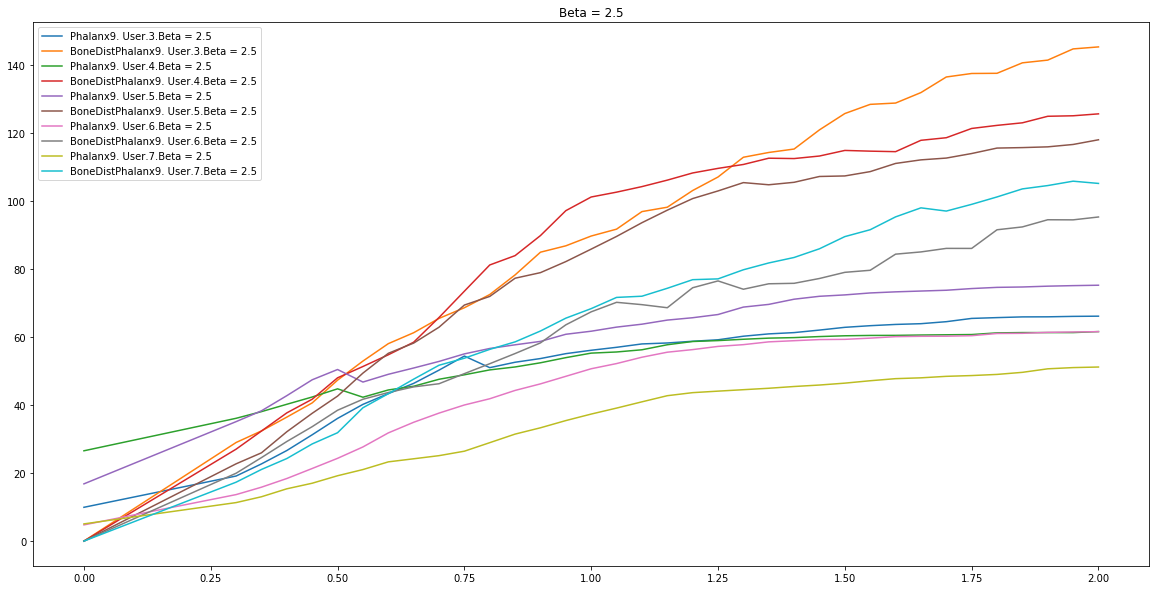

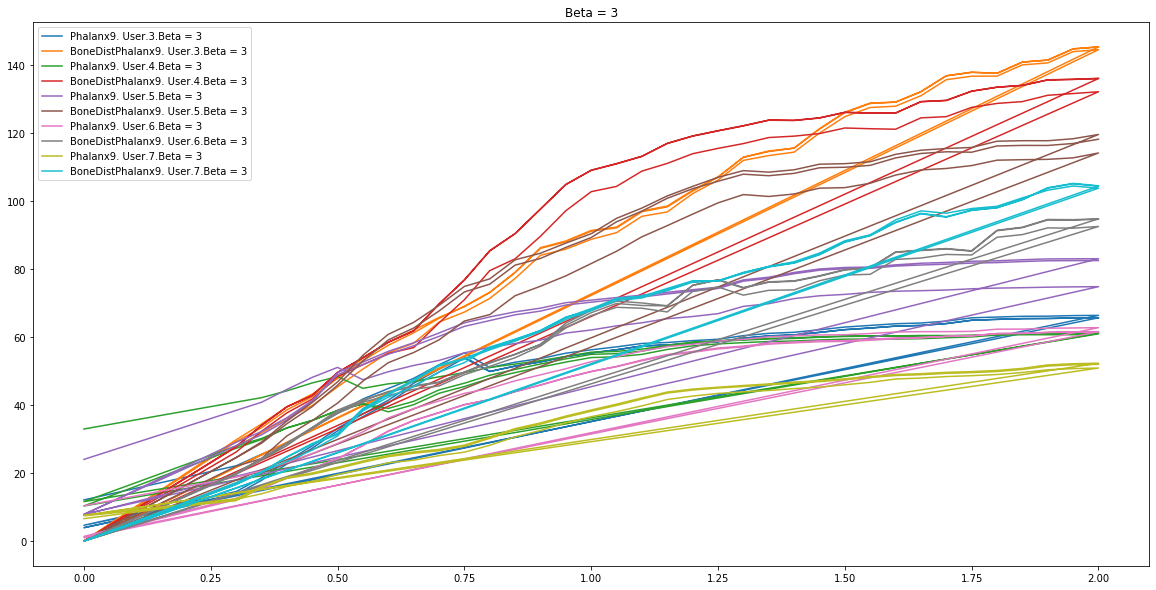

In [74]:
plt.ylim = (0, 140)
for param in range(0, nbBetaGamma):
    cond = globalAnalysis['Beta'] == list_beta[param]
    plt.figure(figsize=(20,10))
    tol = globalAnalysis[cond]['Tolerance']
    for user in range(0, nbUsers):
        cond2 = globalAnalysis['User'] == 'User'+str(3+user)
        #gamma = globalAnalysis[cond&cond2]['Gamma']

        plt.plot(globalAnalysis[cond&cond2]['Tolerance']/1000, globalAnalysis[cond&cond2]['Phalanx.9'], label = 'Phalanx9. User.'+str(3+user)+'.Beta = '+str(list_beta[param]))
        plt.plot(globalAnalysis[cond&cond2]['Tolerance']/1000, globalAnalysis[cond&cond2]['BoneDist.9'], label = 'BoneDistPhalanx9. User.'+str(3+user)+'.Beta = '+str(list_beta[param]))

        plt.title('Beta = '+str(list_beta[param]))
    plt.legend()

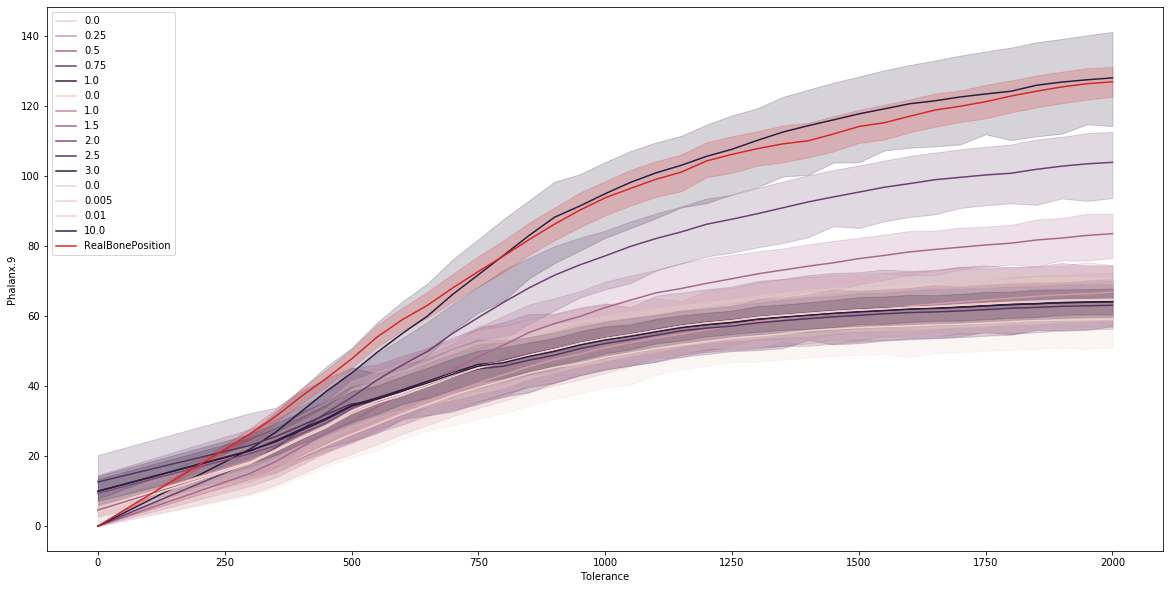

In [75]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Phalanx.9', hue = 'Alpha', data = globalAnalysis)
#plt.figure(figsize=(20,10))
betaplot = sns.lineplot(x = 'Tolerance', y = 'Phalanx.9', hue = 'Beta', data = globalAnalysis)
#plt.figure(figsize=(20,10))
gammaplot = sns.lineplot(x = 'Tolerance', y = 'Phalanx.9', hue = 'Gamma', data = globalAnalysis)

bonedistplot = sns.lineplot(x = 'Tolerance', y = 'BoneDist.9', data = globalAnalysis, label = 'RealBonePosition')



In [276]:
meanUsers[(meanUsers.index == 500) & (meanUsers['Beta'] == 0) & (meanUsers['Gamma'] == 0)][['Phalanx.0']]

Phalanx.0
500   8.738329
500   8.738329

In [19]:
tol = 300
phalanx = 9
tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

tableMe

0       0.01      0.005       0.05        0.1        0.5  \
0.0   17.911349        NaN        NaN        NaN        NaN        NaN   
1.5         NaN  17.135014  17.921076        NaN        NaN        NaN   
3.0         NaN  19.199639  18.740919        NaN  21.371828        NaN   
10.0        NaN  32.860677  33.113736  34.131763  36.917973  49.920519   
1.0         NaN        NaN        NaN        NaN        NaN        NaN   
2.0         NaN        NaN        NaN        NaN        NaN        NaN   
2.5         NaN        NaN        NaN        NaN  19.547040        NaN   

             10  
0.0         NaN  
1.5   18.890142  
3.0   26.508919  
10.0        NaN  
1.0   18.841909  
2.0   20.716180  
2.5   23.059023

# Right Hand heatmap

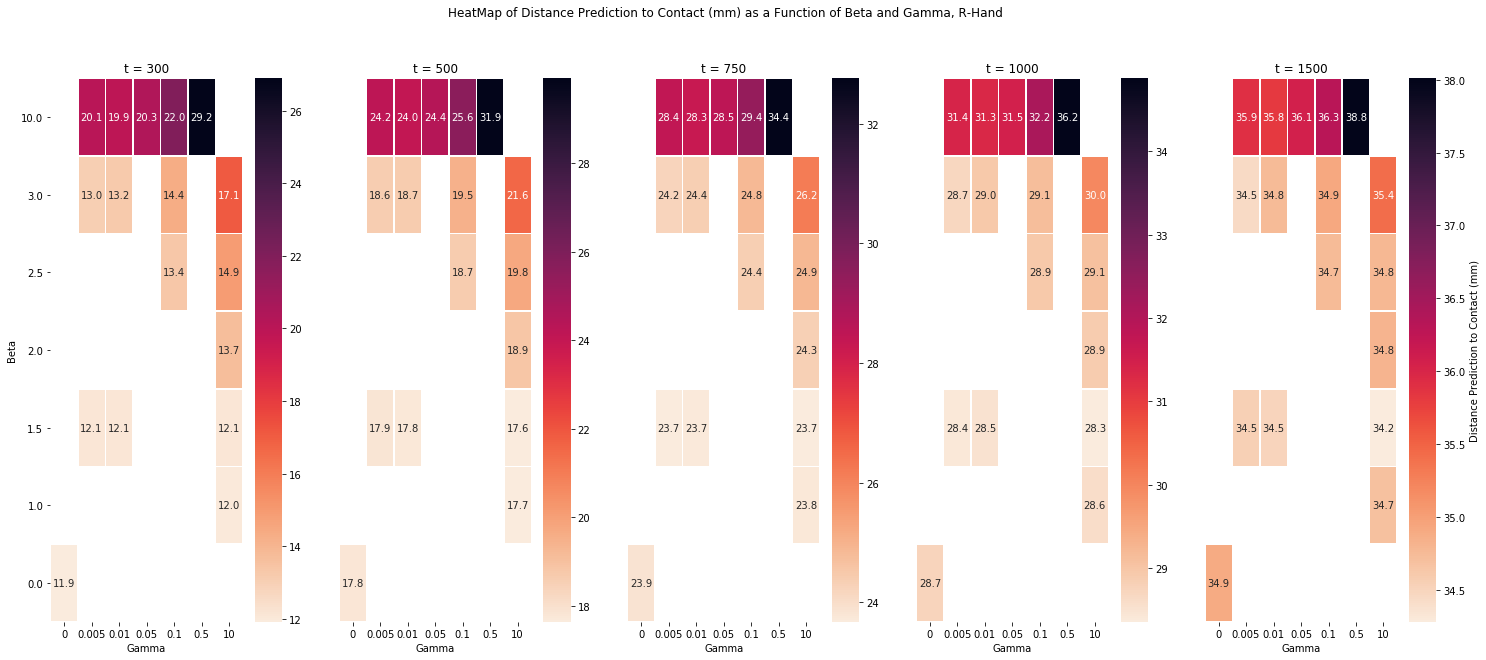

In [20]:
tol = 300
tol2 = 500
tol3 = 750
tol4 = 1000
tol5 = 1500

#vmin = 0
#vmax = 50


cmap = sns.cm.rocket_r

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(25,10))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 19):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']

#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1.set_ylabel('Beta')
g1.set_xlabel('Gamma')
ax1.title.set_text('t = '+str(tol))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 19):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g2 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax2)
g2.set_ylabel('')
g2.set_xlabel('Gamma')#, t = '+str(tol))
g2.set_yticks([])
ax2.title.set_text('t = '+str(tol2))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 19):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3.set_ylabel('')
g3.set_xlabel('Gamma')#, t = '+str(tol))
g3.set_yticks([])
ax3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 19):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g4 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4.set_ylabel('')
g4.set_xlabel('Gamma')#, t = '+str(tol))
g4.set_yticks([])
ax4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 19):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g5 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax5, cbar_kws = {'label' : 'Distance Prediction to Contact (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5.set_ylabel('')
g5.set_xlabel('Gamma')#, t = '+str(tol))
g5.set_yticks([])
ax5.title.set_text('t = '+str(tol5))


# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Beta and Gamma, R-Hand')
plt.show()


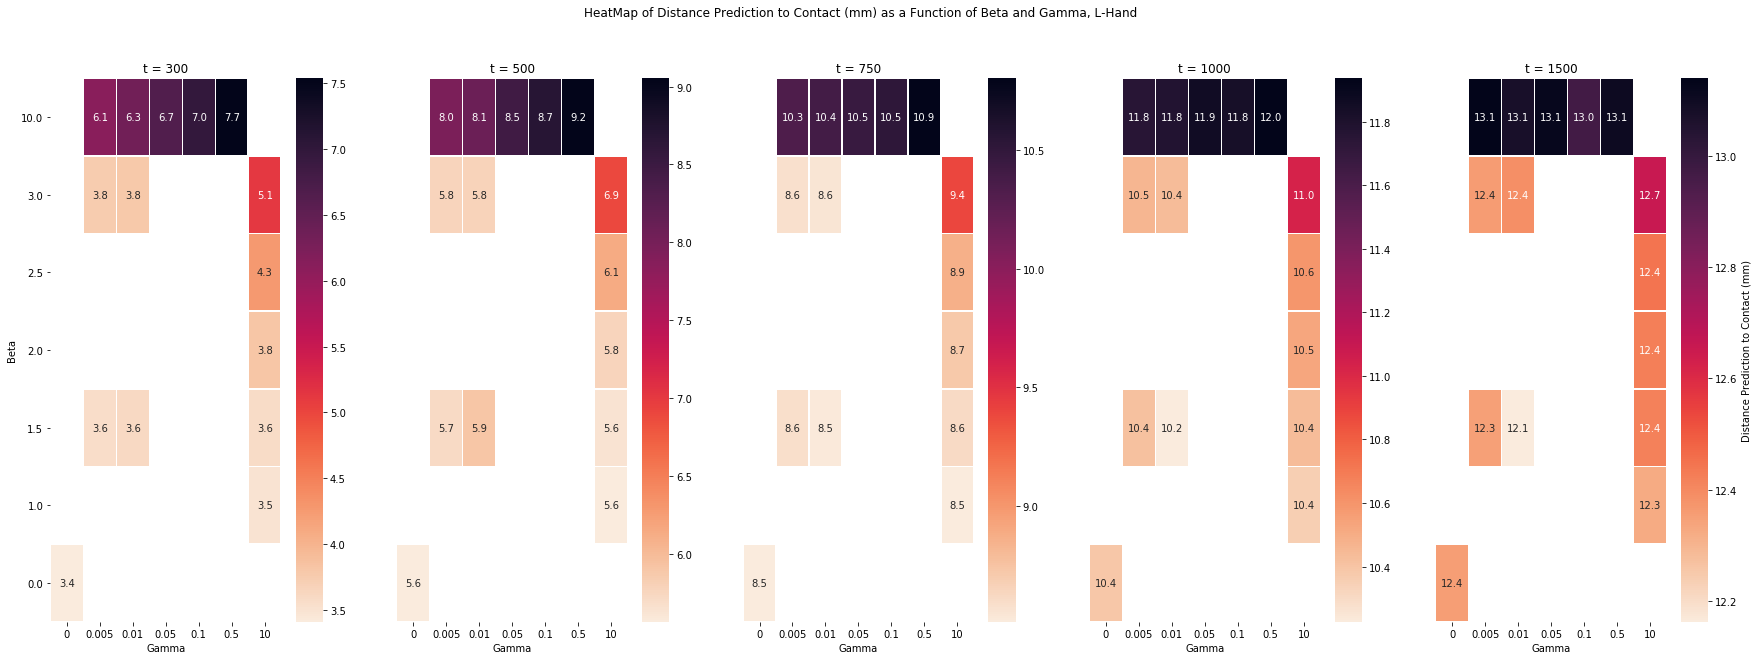

In [279]:
tol = 300
tol2 = 500
tol3 = 750
tol4 = 1000
tol5 = 1500

#vmin = 0
#vmax = 50


cmap = sns.cm.rocket_r

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(30,10))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(19, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']

#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1.set_ylabel('Beta')
g1.set_xlabel('Gamma')
ax1.title.set_text('t = '+str(tol))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(19, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g2 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax2)
g2.set_ylabel('')
g2.set_xlabel('Gamma')#, t = '+str(tol))
g2.set_yticks([])
ax2.title.set_text('t = '+str(tol2))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(19, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3.set_ylabel('')
g3.set_xlabel('Gamma')#, t = '+str(tol))
g3.set_yticks([])
ax3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(19, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g4 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4.set_ylabel('')
g4.set_xlabel('Gamma')#, t = '+str(tol))
g4.set_yticks([])
ax4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(19, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/19
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g5 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax5, cbar_kws = {'label' : 'Distance Prediction to Contact (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5.set_ylabel('')
g5.set_xlabel('Gamma')#, t = '+str(tol))
g5.set_yticks([])
ax5.title.set_text('t = '+str(tol5))


# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Beta and Gamma, L-Hand')
plt.show()


# Whole Hands Heatmap

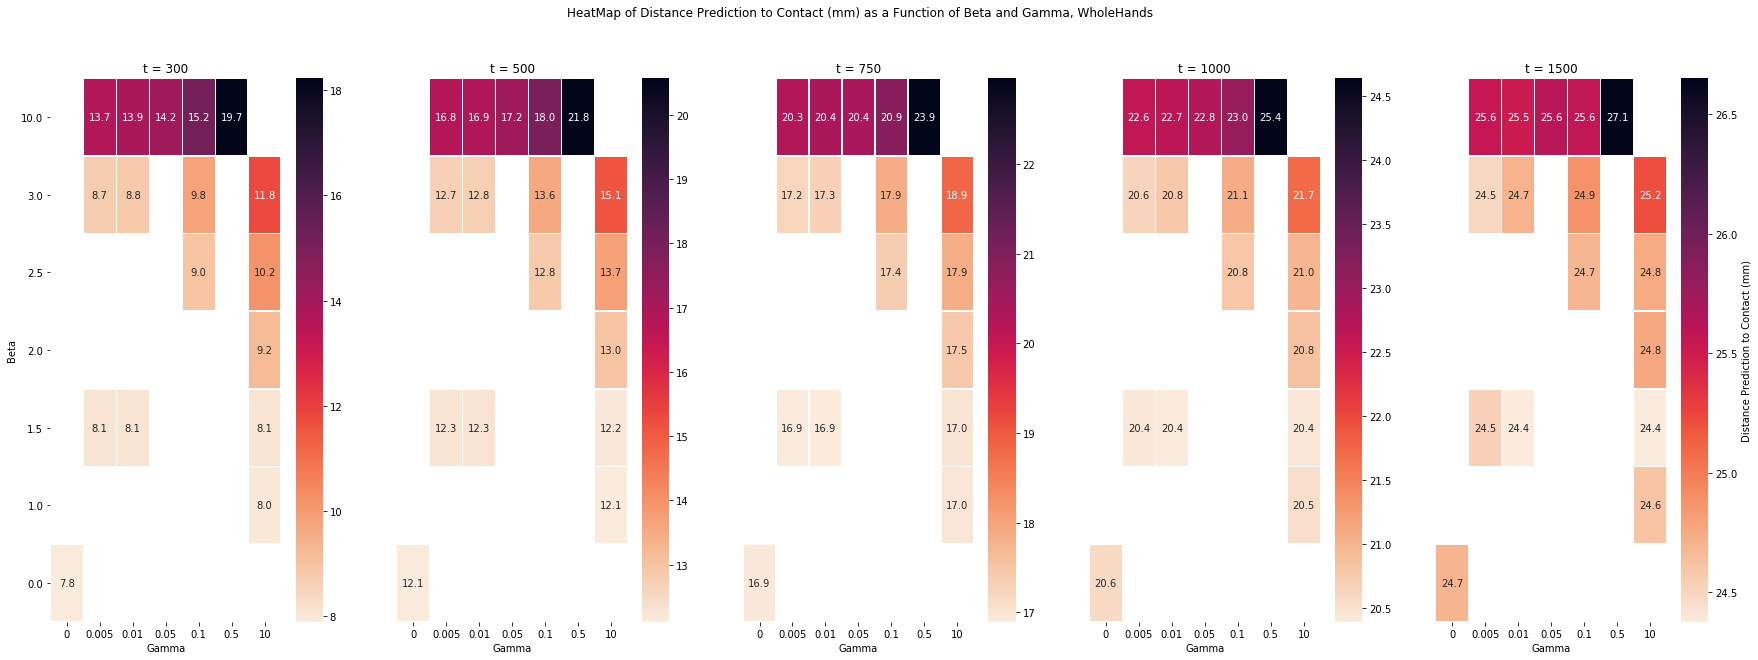

In [45]:
tol = 300
tol2 = 500
tol3 = 750
tol4 = 1000
tol5 = 1500

#vmin = 0
#vmax = 50


cmap = sns.cm.rocket_r

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(30,10))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']

#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1.set_ylabel('Beta')
g1.set_xlabel('Gamma')
ax1.title.set_text('t = '+str(tol))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g2 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax2)
g2.set_ylabel('')
g2.set_xlabel('Gamma')#, t = '+str(tol))
g2.set_yticks([])
ax2.title.set_text('t = '+str(tol2))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3.set_ylabel('')
g3.set_xlabel('Gamma')#, t = '+str(tol))
g3.set_yticks([])
ax3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g4 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4.set_ylabel('')
g4.set_xlabel('Gamma')#, t = '+str(tol))
g4.set_yticks([])
ax4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g5 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax5, cbar_kws = {'label' : 'Distance Prediction to Contact (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5.set_ylabel('')
g5.set_xlabel('Gamma')#, t = '+str(tol))
g5.set_yticks([])
ax5.title.set_text('t = '+str(tol5))


# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Beta and Gamma, WholeHands')
plt.show()


In [333]:
meanAlphaUsers = pd.DataFrame()
for alphi in range(0, nbAlpha):
    for tol in range(0, 50):
        meanAlphaBis = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Alpha'] == list_alpha[alphi])
        meanAlphaBis.loc[globalAnalysis['Tolerance'].iloc[tol], 'Alpha'] = list_alpha[alphi]
        
        for j in range(0, 38):
            meanAlphaBis.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanAlphaBis.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanAlphaUsers = pd.concat([meanAlphaBis, meanAlphaUsers], axis = 0, sort = True)

In [382]:
meanAlphaHand = pd.DataFrame()
for alphi in range(0, nbAlpha):
#    tol = 300
    for tol in range(0, 50):
        mean = 0
        cond = (meanAlphaUsers.index == meanAlphaUsers.index[tol]) & (meanAlphaUsers['Alpha'] == list_alpha[alphi])
        #print(list_alpha[alphi])
        for phalanx in range(0, 38):
            mean += meanAlphaUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
        
        meanAlphaHand.loc[list_alpha[alphi], meanAlphaUsers.index[tol]] = mean/38


Text(0, 0.5, 'Distance to Contact (mm)')

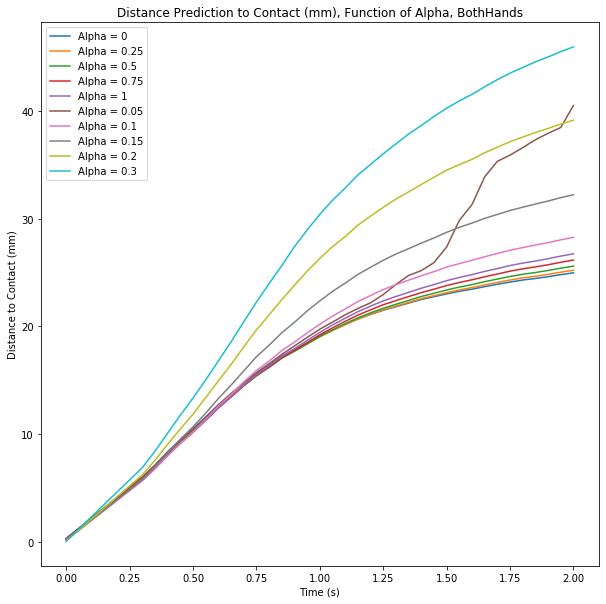

In [394]:
plt.figure(figsize=(10,10))
for i in range(0, len(meanAlphaHand.index)):
    plt.plot(meanAlphaHand.columns[:]/1000, meanAlphaHand.loc[meanAlphaHand.index[i]], label = 'Alpha = ' + str(list_alpha[i]))
    
    
plt.legend()
plt.title('Distance Prediction to Contact (mm), Function of Alpha, BothHands')
plt.xlabel('Time (s)')
plt.ylabel('Distance to Contact (mm)')


Text(0.5, 1, 'HeatMap of Distance to Prediction (mm) as a Function of Alpha')

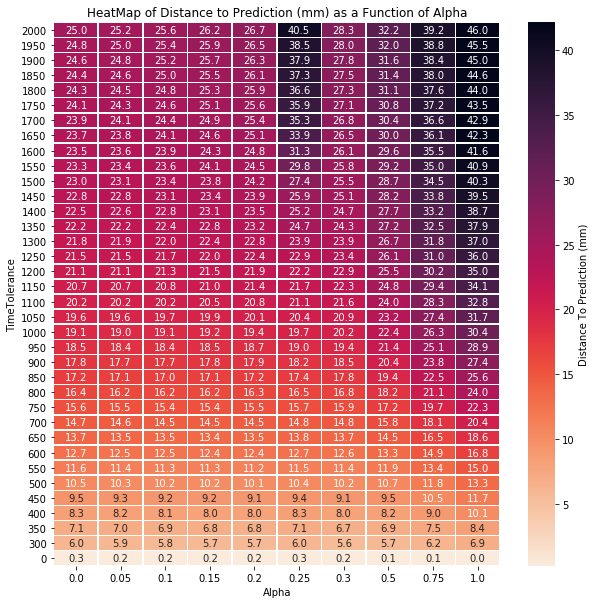

In [383]:
meanAlphaHand = meanAlphaHand.sort_index(ascending = True)
meanAlphaHand = meanAlphaHand.sort_index(axis = 1, ascending = True)

plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(meanAlphaHand.transpose().sort_index(ascending = False), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, robust = True, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

plt.xlabel('Alpha')
plt.ylabel('TimeTolerance')
plt.title('HeatMap of Distance to Prediction (mm) as a Function of Alpha')


In [358]:
meanAlphaUsers.head()

Alpha  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  BoneDist.12  \
900    0.3   98.106776   97.720249    59.573693    97.337387    98.118150   
850    0.3   94.841245   94.692165    57.865698    92.906979    93.837273   
800    0.3   91.078977   90.776960    54.691286    86.424823    87.211553   
750    0.3   85.468860   85.436739    52.735234    82.125456    83.663131   
700    0.3   80.040285   80.008163    50.139495    75.852048    78.691110   

     BoneDist.13  BoneDist.14  BoneDist.15  BoneDist.16  ...  Phalanx.34  \
900    67.486457    89.058291    89.312772    72.517092  ...   18.433461   
850    62.752455    83.646746    85.931124    68.453572  ...   17.828742   
800    59.803116    78.701498    80.631538    66.688037  ...   17.021450   
750    55.940164    72.737146    77.100587    65.362563  ...   16.065151   
700    53.052362    67.629111    71.901967    62.754912  ...   14.450026   

     Phalanx.35  Phalanx.36  Phalanx.37  Phalanx.4  Phalanx.5  Phalanx.6  \
900    5.357872   12.063027   15.412151  12.725820  22.345671  36.578049   
850    5.076556   11.513858   14.899158  12.201933  21.759529  34.250273   
800    4.897935   10.563488   13.978265  11.772334  20.977504  32.488682   
750    4.655324    9.994795   13.404837  11.295806  20.091837  31.110771   
700    4.239987    9.250995   12.277889  10.842072  19.234486  28.789580   

     Phalanx.7  Phalanx.8  Phalanx.9  
900  26.924681  43.370357  51.962418  
850  25.960359  41.262317  49.879088  
800  24.973899  38.959218  47.235193  
750  23.687952  36.402069  44.540779  
700  23.032818  33.926970  41.641332  

[5 rows x 77 columns]

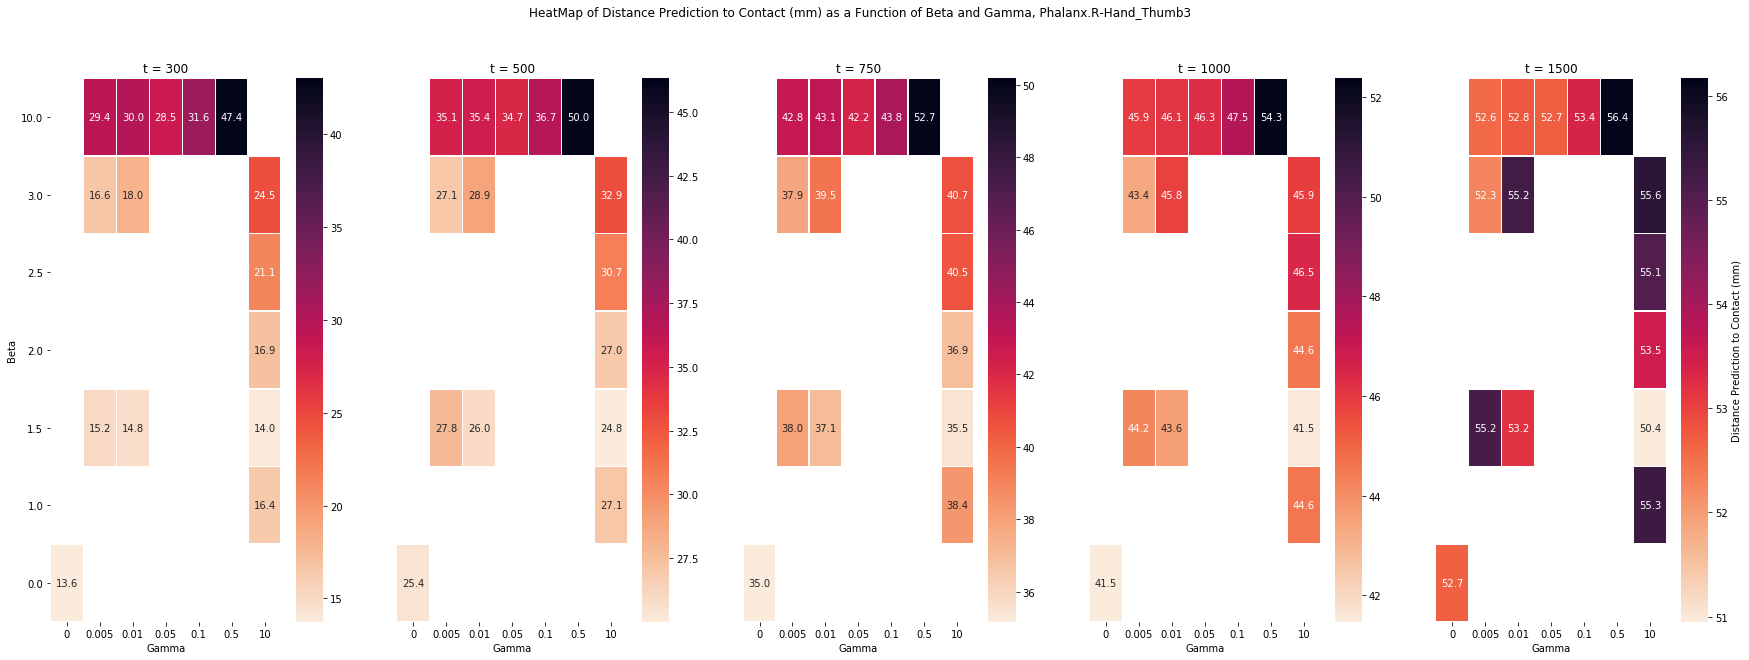

In [262]:
tol = 300
tol2 = 500
tol3 = 750
tol4 = 1000
tol5 = 1500

phalanx = 6
#vmin = 0
#vmax = 50


cmap = sns.cm.rocket_r

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(30,10))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1.set_ylabel('Beta')
g1.set_xlabel('Gamma')
ax1.title.set_text('t = '+str(tol))



tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]


g2 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax2)
g2.set_ylabel('')
g2.set_xlabel('Gamma')#, t = '+str(tol))
g2.set_yticks([])
ax2.title.set_text('t = '+str(tol2))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3.set_ylabel('')
g3.set_xlabel('Gamma')#, t = '+str(tol))
g3.set_yticks([])
ax3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g4 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4.set_ylabel('')
g4.set_xlabel('Gamma')#, t = '+str(tol))
g4.set_yticks([])
ax4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g5 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax5, cbar_kws = {'label' : 'Distance Prediction to Contact (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5.set_ylabel('')
g5.set_xlabel('Gamma')#, t = '+str(tol))
g5.set_yticks([])
ax5.title.set_text('t = '+str(tol5))


# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Beta and Gamma, Phalanx.'+boneNames[phalanx])
plt.show()


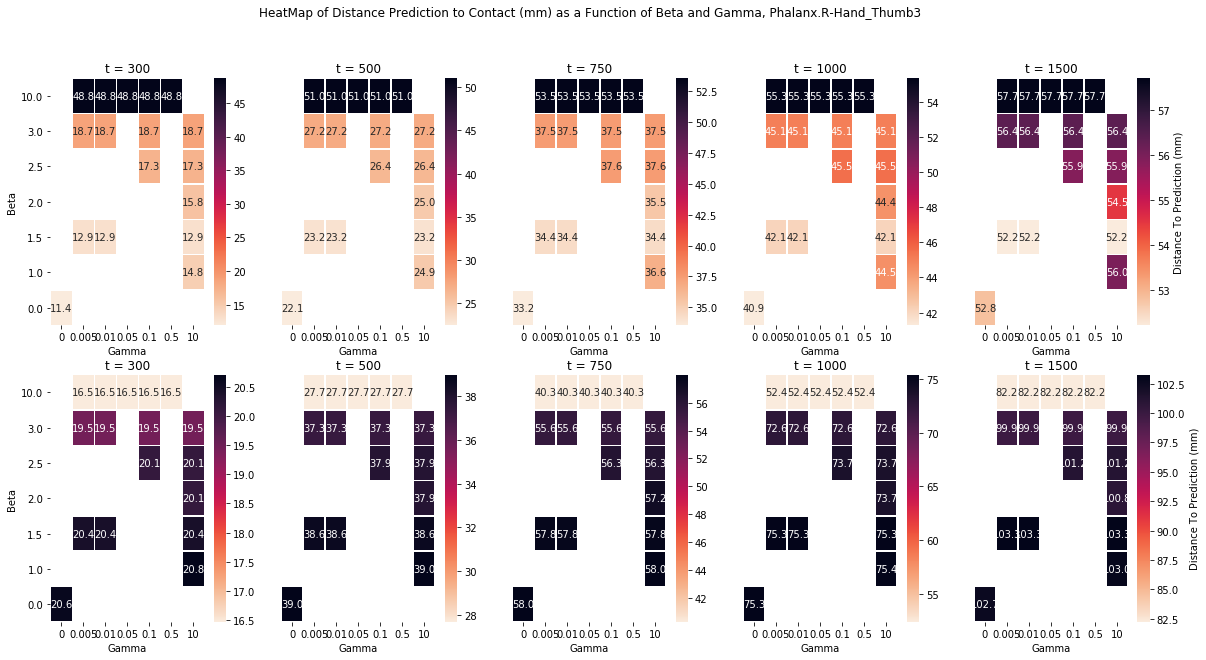

In [46]:
tol = 300
tol2 = 500
tol3 = 750
tol4 = 1000
tol5 = 1500

phalanx = 6
#vmin = 0
#vmax = 50


cmap = sns.cm.rocket_r

f,((ax1,ax2,ax3,ax4,ax5), (axb1,axb2,axb3,axb4,axb5)) = plt.subplots(2,5, figsize=(20,10))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = ax1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1.set_ylabel('Beta')
g1.set_xlabel('Gamma')
ax1.title.set_text('t = '+str(tol))



tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]


g2 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = ax2)
g2.set_ylabel('')
g2.set_xlabel('Gamma')#, t = '+str(tol))
g2.set_yticks([])
ax2.title.set_text('t = '+str(tol2))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = ax3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3.set_ylabel('')
g3.set_xlabel('Gamma')#, t = '+str(tol))
g3.set_yticks([])
ax3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g4 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = ax4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4.set_ylabel('')
g4.set_xlabel('Gamma')#, t = '+str(tol))
g4.set_yticks([])
ax4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g5 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = ax5, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5.set_ylabel('')
g5.set_xlabel('Gamma')#, t = '+str(tol))
g5.set_yticks([])
ax5.title.set_text('t = '+str(tol5))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'BoneDist.'+str(phalanx)] = meanUsers[cond].iloc[0]['BoneDist.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['BoneDist.'+str(phalanx)]

#ax1.get_shared_y_axes().join(ax2,ax3)
g1b = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = axb1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1b.set_ylabel('Beta')
g1b.set_xlabel('Gamma')
axb1.title.set_text('t = '+str(tol))



tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'BoneDist.'+str(phalanx)] = meanUsers[cond].iloc[0]['BoneDist.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['BoneDist.'+str(phalanx)]


g2b = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = axb2)
g2b.set_ylabel('')
g2b.set_xlabel('Gamma')#, t = '+str(tol))
g2b.set_yticks([])
axb2.title.set_text('t = '+str(tol2))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'BoneDist.'+str(phalanx)] = meanUsers[cond].iloc[0]['BoneDist.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['BoneDist.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g3b = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = axb3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3b.set_ylabel('')
g3b.set_xlabel('Gamma')#, t = '+str(tol))
g3b.set_yticks([])
axb3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'BoneDist.'+str(phalanx)] = meanUsers[cond].iloc[0]['BoneDist.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['BoneDist.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g4b = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = axb4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4b.set_ylabel('')
g4b.set_xlabel('Gamma')#, t = '+str(tol))
g4b.set_yticks([])
axb4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'BoneDist.'+str(phalanx)] = meanUsers[cond].iloc[0]['BoneDist.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['BoneDist.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g5b = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, ax = axb5, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5b.set_ylabel('')
g5b.set_xlabel('Gamma')#, t = '+str(tol))
g5b.set_yticks([])
axb5.title.set_text('t = '+str(tol5))

# may be needed to rotate the ticklabels correctly:
for ax in [g1b,g2b,g3b,g4b,g5b]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Bone to Contact (mm) as a Function of Beta and Gamma, Phalanx.'+boneNames[phalanx])







# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Beta and Gamma, Phalanx.'+boneNames[phalanx])
plt.show()


In [ ]:
tol = 500
phalanx = 9
vmin = 10
vmax = 30


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]


plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

#sns.heatmap(tableMe, annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
plt.xlabel('Gamma')
plt.ylabel('Beta')
plt.title('HeatMap of Distance to Prediction (mm) as a Function of Beta and Gamma, at t = '+str(tol/1000)+'s, Phalanx.'+boneNames[phalanx])

Text(0.5, 1, 'HeatMap of Distance to Prediction (mm) as a Function of Beta and Gamma, at t = 0.5s, Phalanx.R-Hand_Index3')

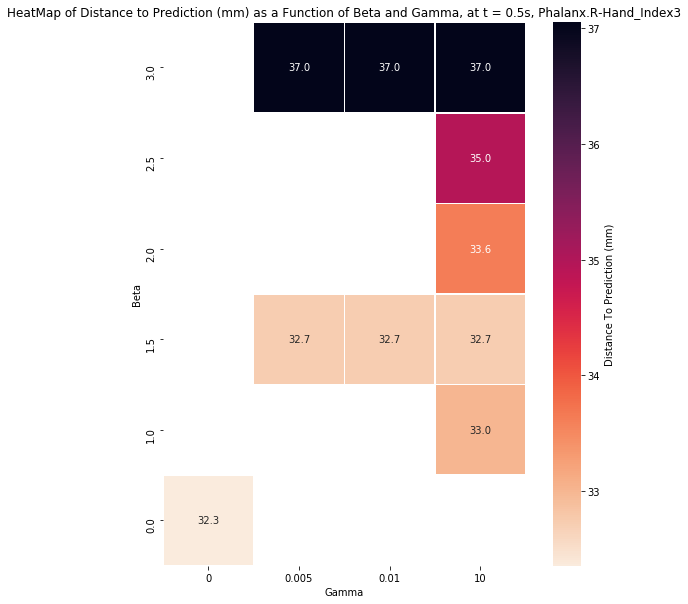

In [169]:
tol = 500
phalanx = 9
vmin = 10
vmax = 30


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]


plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

#sns.heatmap(tableMe, annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
plt.xlabel('Gamma')
plt.ylabel('Beta')
plt.title('HeatMap of Distance to Prediction (mm) as a Function of Beta and Gamma, at t = '+str(tol/1000)+'s, Phalanx.'+boneNames[phalanx])

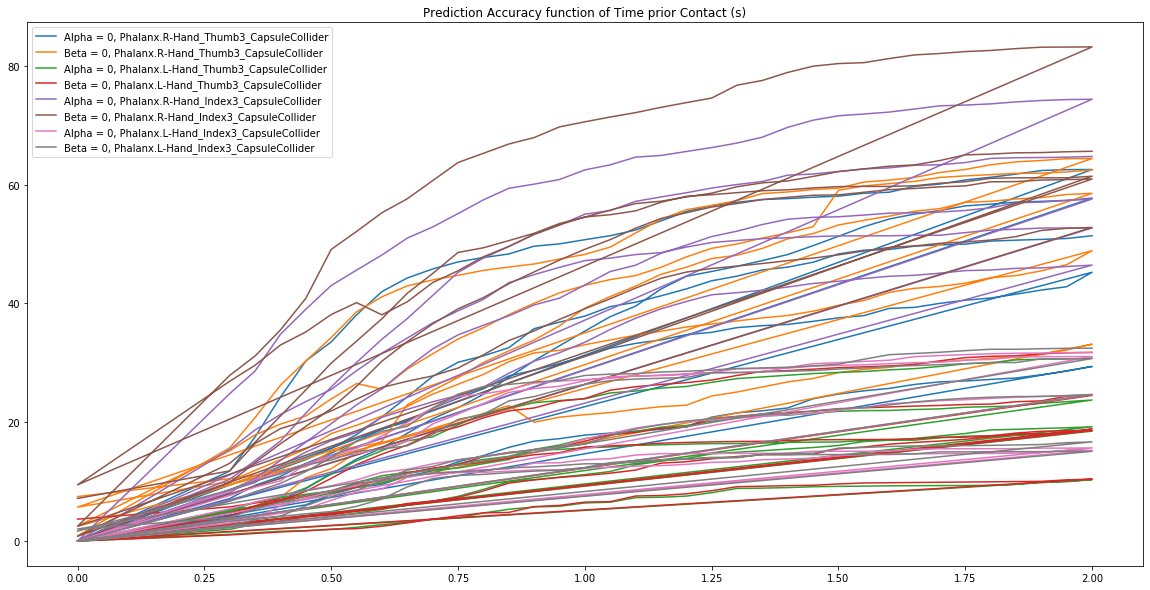

In [76]:
plt.figure(figsize=(20,10))
cond1 = globalAnalysis['Alpha'] == 0
cond0 = globalAnalysis['Beta'] == 0
for j in range(6, 12, 3):
#plt.plot(globalAnalysis[globalAnalysis['Alpha'] == 1]['Tolerance'], globalAnalysis[globalAnalysis['Alpha'] == 1]['Success.Phalanx.9'], label = 'Alpha 1')
    plt.plot(globalAnalysis[cond1]['Tolerance']/1000, globalAnalysis[cond1]['Phalanx.'+str(j)], label = 'Alpha = 0, Phalanx.'+boneNames[j])
    plt.plot(globalAnalysis[cond0]['Tolerance']/1000, globalAnalysis[cond0]['Phalanx.'+str(j)], label = 'Beta = 0, Phalanx.'+boneNames[j])
    
    plt.plot(globalAnalysis[cond1]['Tolerance']/1000, globalAnalysis[cond1]['Phalanx.'+str(j+19)], label = 'Alpha = 0, Phalanx.'+boneNames[j+19])
    plt.plot(globalAnalysis[cond0]['Tolerance']/1000, globalAnalysis[cond0]['Phalanx.'+str(j+19)], label = 'Beta = 0, Phalanx.'+boneNames[j+19])

plt.title('Prediction Accuracy function of Time prior Contact (s)')

plt.ylim = (0, 100)
plt.legend()

In [27]:
analysisPerObj.columns

Index(['Alpha', 'Beta', 'Cube', 'Cylinder', 'Gamma', 'Tolerance', 'User',
       'obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6'],
      dtype='object')

In [42]:
globalAnalysis['User'].describe()

count       720
unique        2
top       User4
freq        360
Name: User, dtype: object

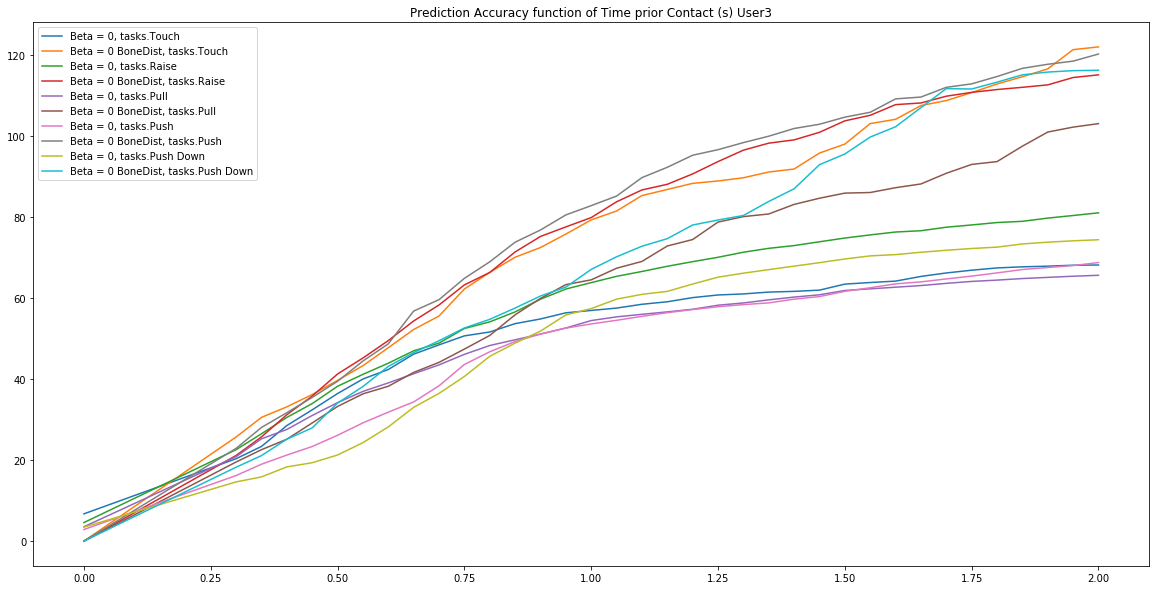

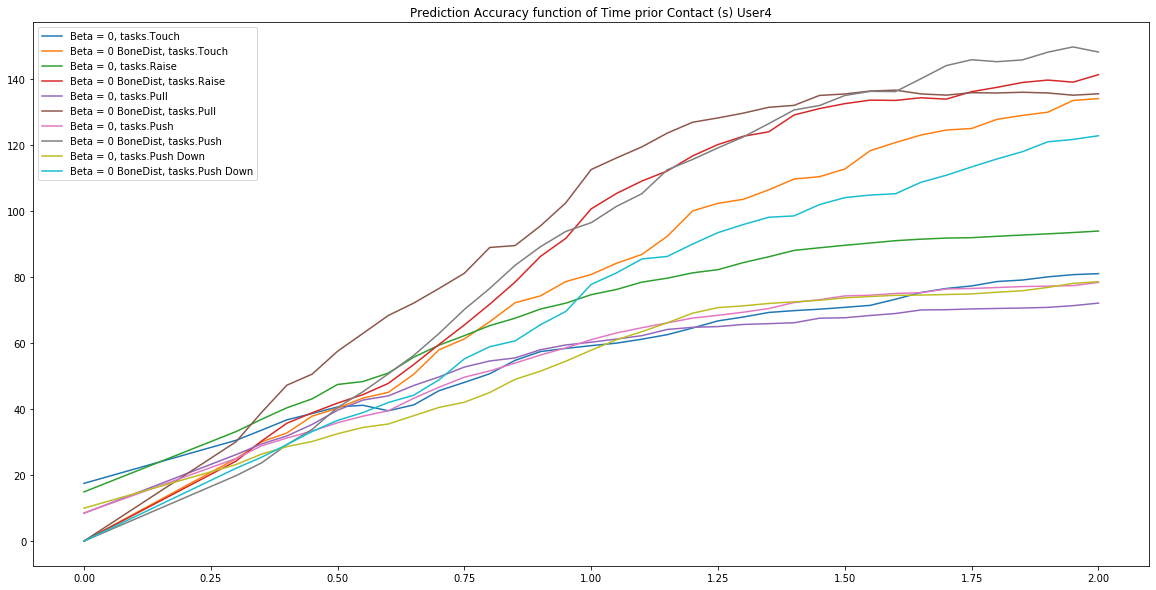

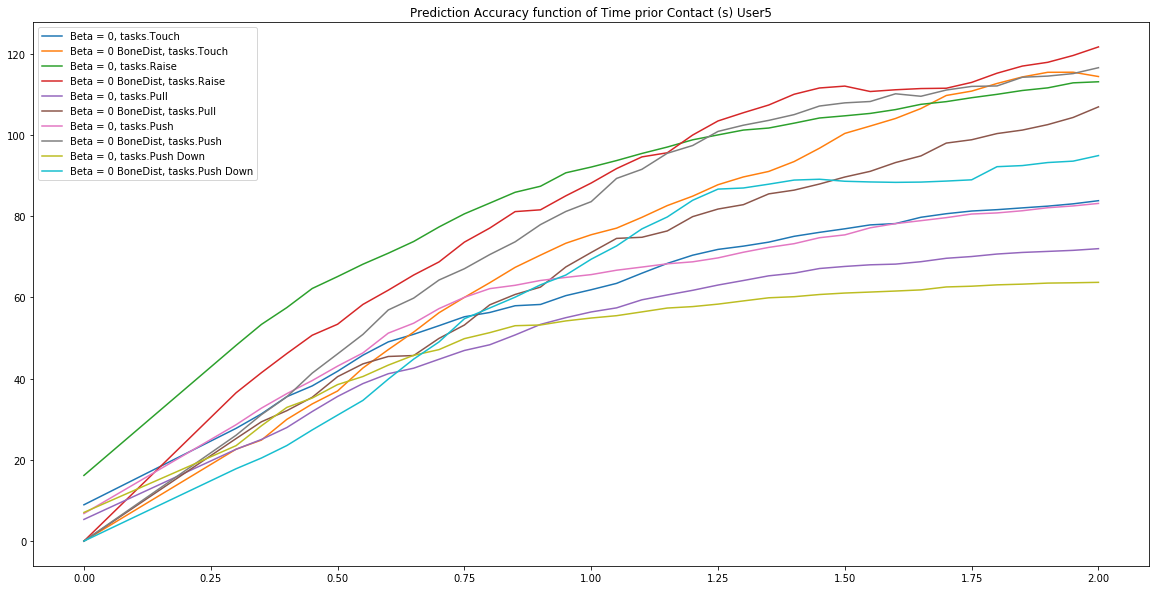

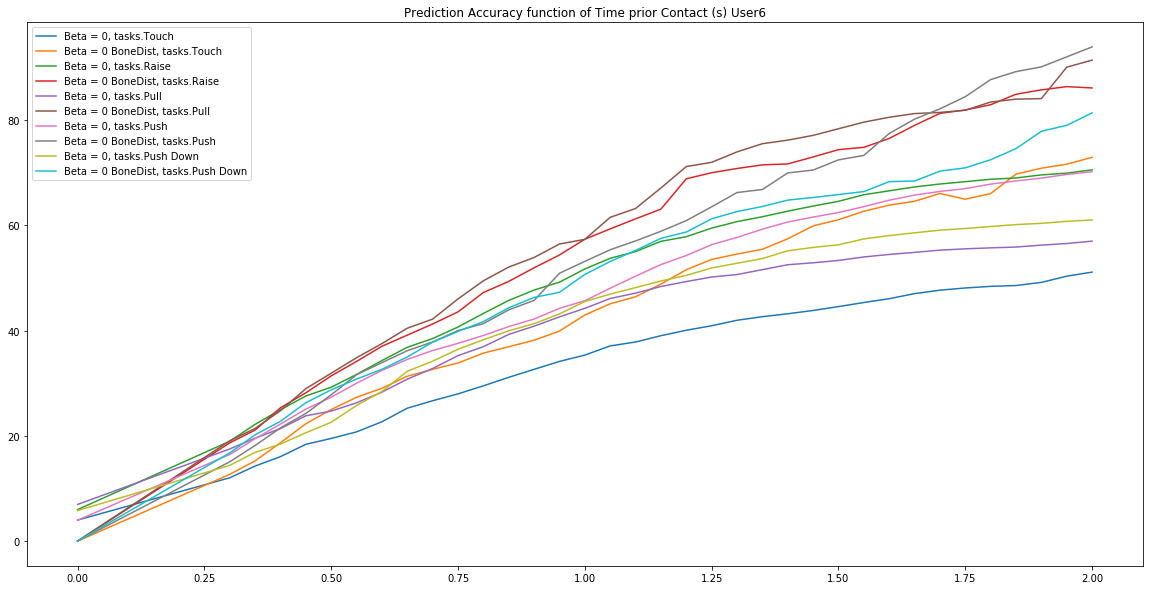

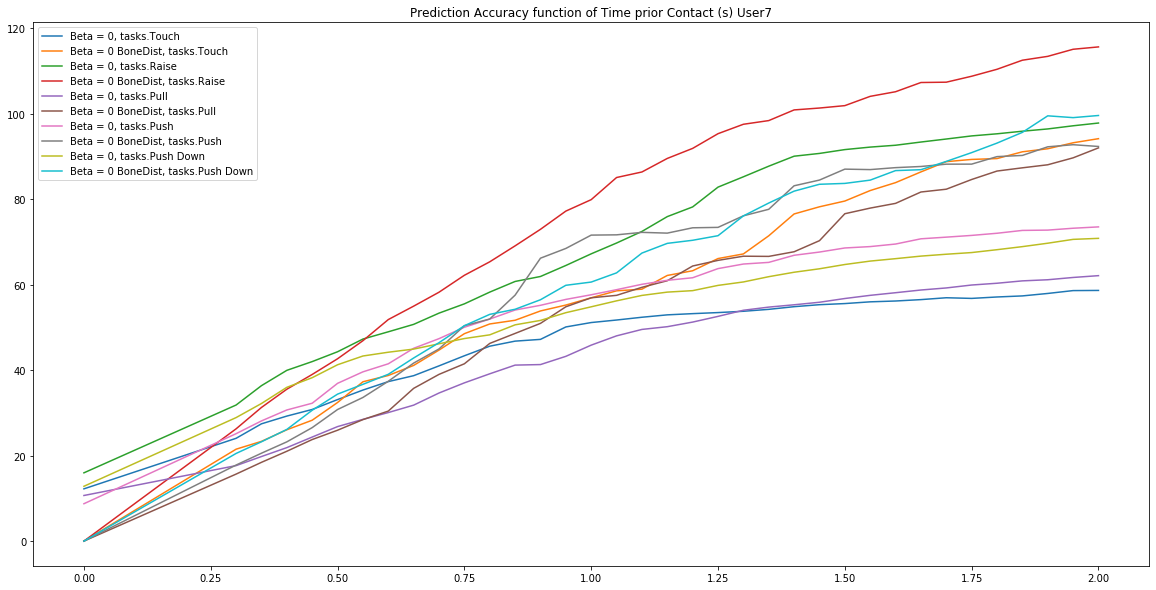

In [85]:
for i in range(0, nbUsers):
    plt.figure(figsize=(20,10))
    cond3 = analysisPerTask['User'] == 'User'+str(3+i)
    cond1 = analysisPerTask['Alpha'] == 0
    cond0 = analysisPerTask['Beta'] == 0
    for k in range(0, len(tasks)):
        #plt.plot(analysisPerTask[cond1]['Tolerance'], analysisPerTask[cond1][tasks[k]], label = 'Alpha = 0, tasks'+tasks[k])
        plt.plot(analysisPerTask[cond0&cond3]['Tolerance']/1000, analysisPerTask[cond0&cond3][tasks[k]], label = 'Beta = 0, tasks.'+tasks[k])
        plt.plot(analysisBoneDistPerTask[cond0&cond3]['Tolerance']/1000, analysisBoneDistPerTask[cond0&cond3][tasks[k]], label = 'Beta = 0 BoneDist, tasks.'+tasks[k])

    plt.title('Prediction Accuracy function of Time prior Contact (s) User'+str(3+i))

    plt.ylim = (0, 100)
    plt.legend()

In [44]:
analysisPerTask.tail()

Alpha  Beta  Gamma       Pull       Push  Push Down      Raise  \
Tolerance                                                                   
1800         NaN   0.0    0.0  64.413695  66.192709  72.555225  78.620041   
1850         NaN   0.0    0.0  64.799805  67.027381  73.341921  78.923862   
1900         NaN   0.0    0.0  65.088181  67.517821  73.775532  79.718116   
1950         NaN   0.0    0.0  65.370431  68.000276  74.110259  80.356534   
2000         NaN   0.0    0.0  65.605877  68.751365  74.378029  81.020492   

           Tolerance      Touch   User  
Tolerance                               
1800            1800  67.419845  User3  
1850            1850  67.692072  User3  
1900            1900  67.854672  User3  
1950            1950  68.090302  User3  
2000            2000  68.142426  User3

In [175]:
len((analysisPerTask[cond0]['Tolerance']))

0

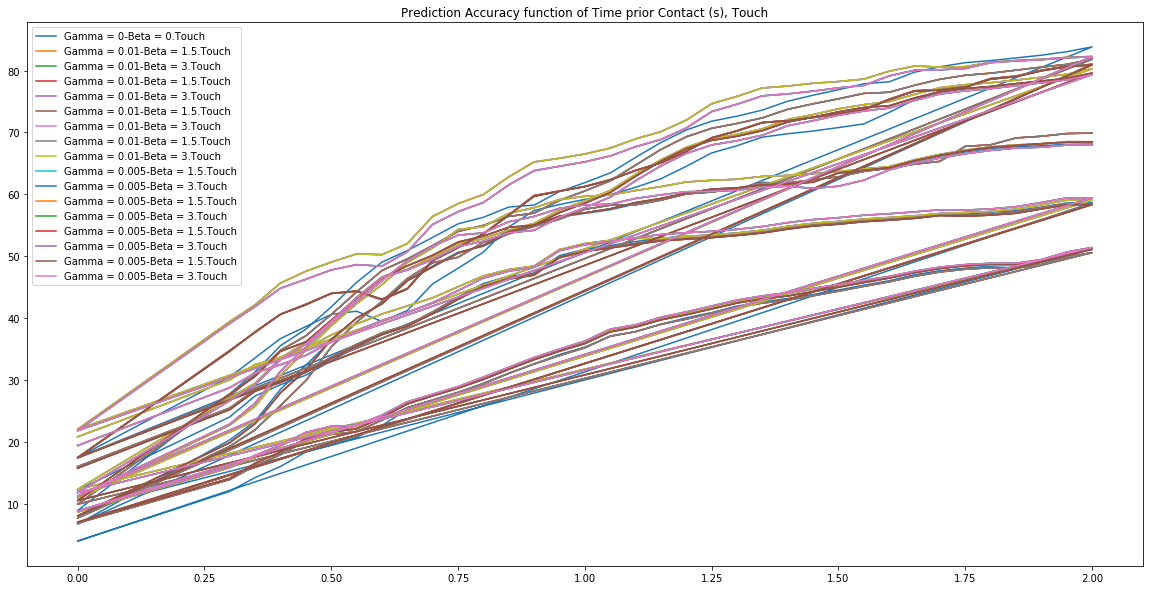

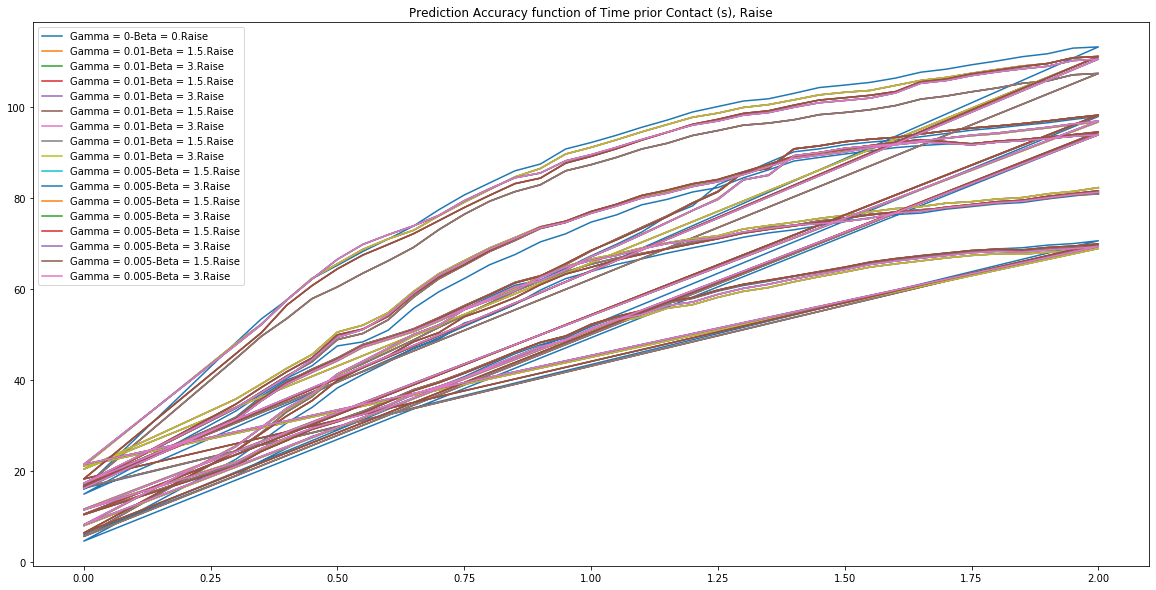

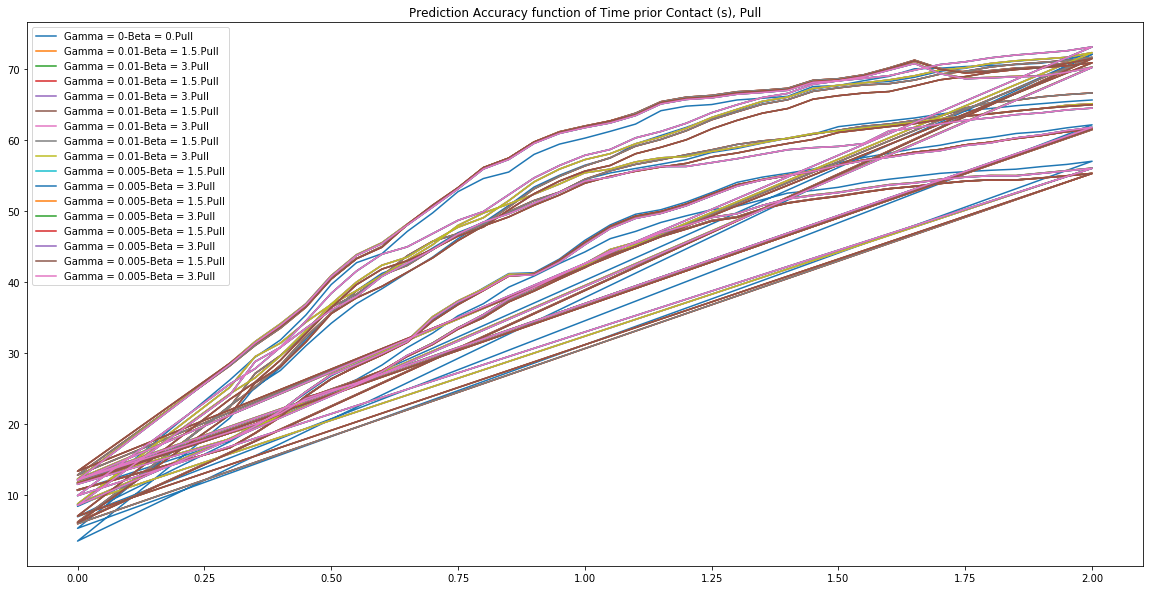

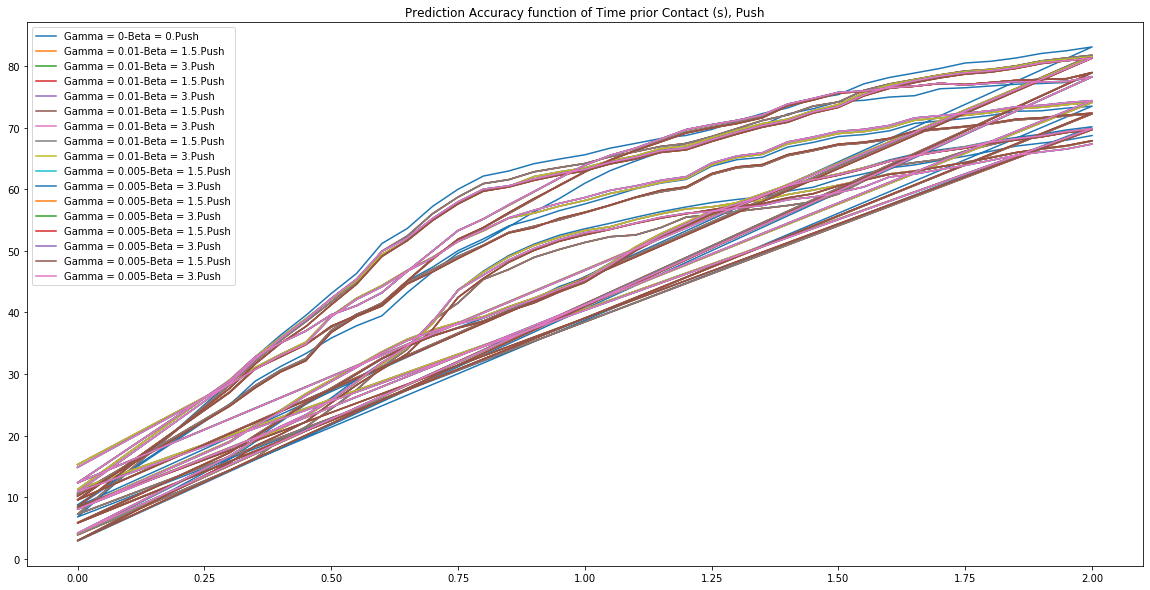

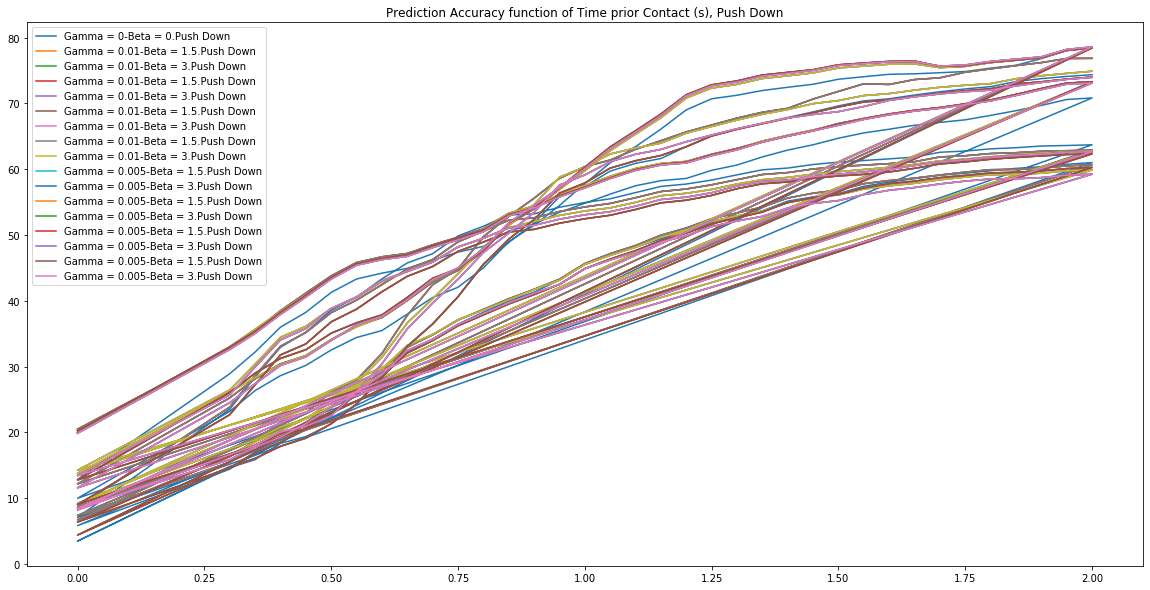

In [87]:
#plt.figure(figsize=(20,10))
cond1 = globalAnalysis['Alpha'] == 0
#cond0 = globalAnalysis['Beta'] == 0
for k in range(0, len(tasks)):
    plt.figure(figsize=(20,10))
    for j in range(0, nbBetaGamma):
        for i in range(0, nbBetaGamma):
            cond0 = (globalAnalysis['Gamma'] == float(list_gamma[j])) & (globalAnalysis['Beta'] == float(list_beta[i]))
            if(len(analysisPerTask[cond0]['Tolerance']) != 0):
                plt.plot(analysisPerTask[cond0]['Tolerance']/1000, analysisPerTask[cond0][tasks[k]], label = 'Gamma = '+ str(list_gamma[j]) + '-Beta = '+ str(list_beta[i])+ '.' +str(tasks[k]))
                plt.title('Prediction Accuracy function of Time prior Contact (s), '+tasks[k])

            else:
                pass
    plt.legend()

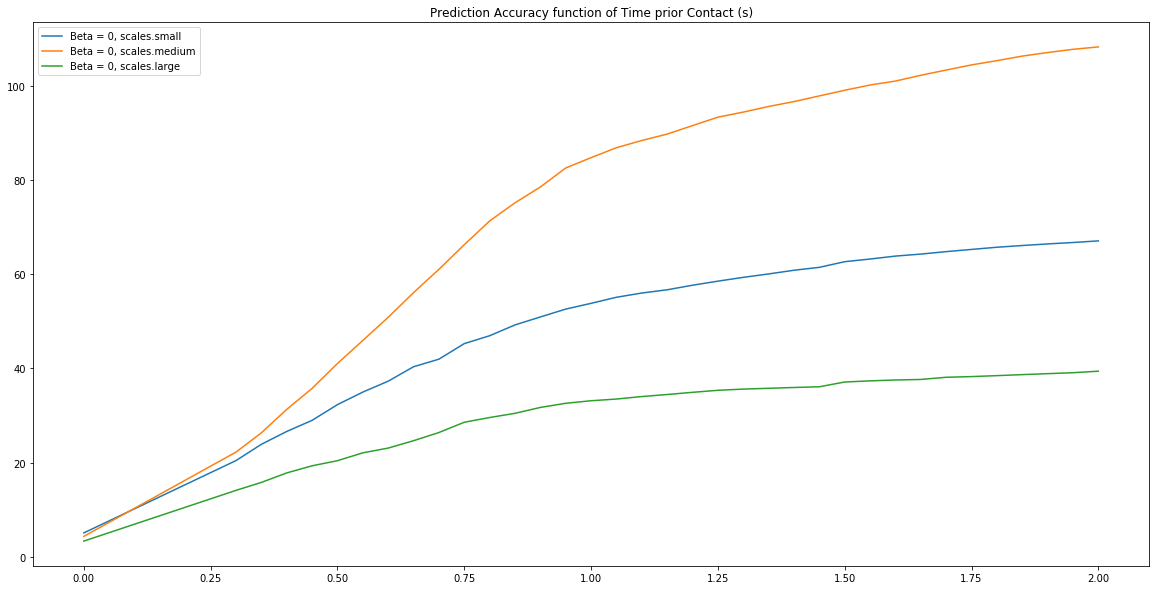

In [184]:
plt.figure(figsize=(20,10))
cond1 = globalAnalysis['Alpha'] == 0
cond0 = globalAnalysis['Beta'] == 0
for k in range(0, len(scales)):
    #plt.plot(analysisPerTask[cond1]['Tolerance'], analysisPerTask[cond1][tasks[k]], label = 'Alpha = 0, tasks'+tasks[k])
    plt.plot(analysisPerScale[cond0]['Tolerance']/1000, analysisPerScale[cond0][scales[k]], label = 'Beta = 0, scales.'+scales[k])
plt.title('Prediction Accuracy function of Time prior Contact (s)')

plt.ylim = (0, 100)
plt.legend()

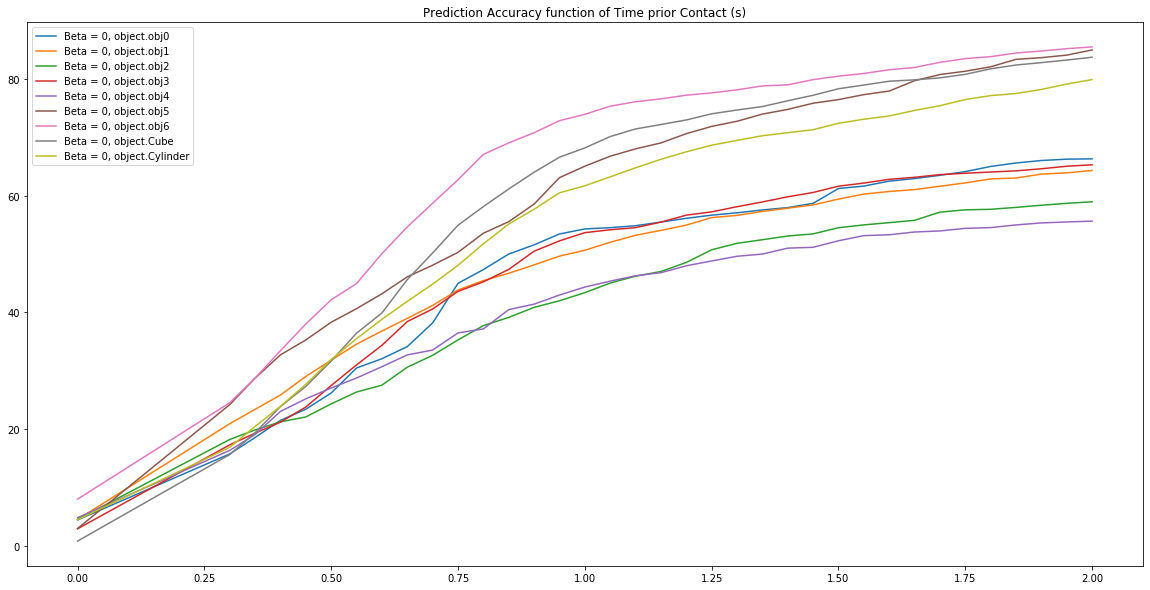

In [185]:
plt.figure(figsize=(20,10))
cond1 = globalAnalysis['Alpha'] == 0
cond0 = globalAnalysis['Beta'] == 0
for k in range(0, len(objects)):
    #plt.plot(analysisPerTask[cond1]['Tolerance'], analysisPerTask[cond1][tasks[k]], label = 'Alpha = 0, tasks'+tasks[k])
    plt.plot(analysisPerObj[cond0]['Tolerance']/1000, analysisPerObj[cond0][objects[k]], label = 'Beta = 0, object.'+objects[k])
plt.title('Prediction Accuracy function of Time prior Contact (s)')

plt.ylim = (0, 100)
plt.legend()

In [70]:
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+'.csv', sep = ";", decimal = '.')
        
#        for k in range(0, 38):    
#            if(('Phalanx.'+str(k) in betaGammaTime.columns) == True):    
#                betaGammaTime['Dist.Phalanx.'+str(k)] = betaGammaTime['Phalanx.'+str(k)]
#                del betaGammaTime['Phalanx.'+str(k)]
#            else:
#                pass
            
        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]
                
        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)
        
    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perObject-'+list_names[j]+'.csv', sep = ';', decimal = '.')
        
#        for k in range(0, len(objects)):    
#            alphaTime['Dist.'+objects[k]] = alphaTime[objects[k]]
#            del alphaTime[objects[k]]
            
        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        #alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]
        
        analysisPerObj = pd.concat([alphaSummary, analysisPerObj], axis = 0, sort=True)


In [71]:
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+'.csv', sep = ";", decimal = '.')
            
        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]
        
        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)
        
    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perTask-'+list_names[j]+'.csv', sep = ';', decimal = '.')
            
        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]
        
        analysisPerTask = pd.concat([alphaSummary, analysisPerTask], axis = 0, sort=True)


In [72]:
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Planes/G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+'.csv', sep = ";", decimal = '.')
        
        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]
        
        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)
        
    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/Projections/A-'+str(alpha)+'-perScale-'+list_names[j]+'.csv', sep = ';', decimal = '.')
            
        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = alphaTime
        alphaSummary.index = alphaTime['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]
        
        analysisPerScale = pd.concat([alphaSummary, analysisPerScale], axis = 0, sort=True)
